In [1]:
import matplotlib, csv, pandas, sys, os, random, copy, sklearn
import geocoder
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 20)

In [1]:
def get_ax(figsize=(8, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return ax
pd.set_option("display.max_rows", 20, "display.max_columns", 20)
matplotlib.rcParams.update({'font.size': 22})

NameError: name 'pd' is not defined

In [4]:
def fix_df(df):
    key_lst = df.columns
    new_dict = {}
    better_dict = {}
    index_lst = []
    for i, rows in df.iterrows():
        j = (i[1], i[0])
        if i not in index_lst:                               # if inter not counted
            if j not in index_lst:                               # if inter not a double
                index_lst.append(i)                                  # add inter to counted list
                new_dict[i] = dict(df.loc[i])                        # add inter row to new dict
            else:                                                # if inter is a double
                for key in key_lst:                                  # add redundant inter data (\ lat, lon) to orig inter data
                    if key == 'Latitude' or key == 'Longitude':
                        new_dict[j][key] = dict(df.loc[i])[key]
                    else:
                        new_dict[j][key] += dict(df.loc[i])[key]
    for key in new_dict.keys():
        if type(key[0]) == float:
            better_dict[key[1]] = new_dict[key]
        elif type(key[1]) == float:
            better_dict[key[0]] = new_dict[key]
        else:
            better_dict[str(key[0]) + ', ' + str(key[1])] = new_dict[key]
    return DataFrame.from_dict(better_dict, orient='index')

In [5]:
def multi_plot(df, save, key, title=None, rev=False, nrow=4, ncol=5, size=(20, 10), shx=True, shy=True, ytik=[0, 30, 60]):
    fig, axs = plt.subplots(nrow, ncol, figsize=size, sharex=shx, sharey=shy, constrained_layout=True)
    if title != None:
        fig.suptitle(title, size=25)
    plt.setp(axs, yticks=ytik)
    for ax in fig.axes:
        matplotlib.pyplot.sca(ax)
        plt.xticks(rotation=90)
    count = 0
    rownum = 0
    while rownum < nrow:
        colnum = 0
        while colnum < ncol:
            if rev == False:
                name = key.index[count]
            else:
                name=key.index[-(count + 1)]
            axs[rownum, colnum].plot(df.loc[name][3:], color = '0')            
            #axs[rownum, colnum].set_title(str(name[0]) + '-'+ str(name[1]), size=18)
            axs[rownum, colnum].set_title(name, size=17)
            axs[rownum, colnum].tick_params(axis='x', labelsize=25)
            axs[rownum, colnum].tick_params(axis='y', labelsize=25)
            axs[rownum, colnum].spines['right'].set_visible(False)
            axs[rownum, colnum].spines['top'].set_visible(False)


            count += 1
            colnum += 1
        rownum += 1
    i = 0    
    while i <= nrow-1:
        axs[i, 0].set_ylabel('Collisions', size=25)
        i += 1
    plt.savefig(save)

In [6]:
all_data = pandas.read_csv(r"C:\Users\tente\OneDrive\Documents\CS638\Madison 1994 - Aug 2020.csv", encoding='latin-1')
#all_data = pandas.read_csv(r"C:\Users\Owner\OneDrive\Documents\CS638\Madison 1994 - Aug 2020.csv", encoding='latin-1')

c:\users\tente\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
dates = all_data['ACCDDATE'] # series w/ only dates of acc
injtime = all_data[['NTFYHOUR', 'TOTINJ', 'TOTFATL']] # df with time, injuries, fatalities

In [8]:
# dict w/ dates as key and # Collisions as value
date_dict = {}
for date in dates:
    if date not in date_dict:
        date_dict[date] = 1
    else:
        date_dict[date] += 1
date_df = DataFrame(date_dict, index = ["number of Collisions"]).transpose()

In [9]:
streets = all_data[['ONSTR','ATSTR']] # df with only intersection

In [10]:
# dict with intersection as key and # of Collisions as value
street_dict = {}
i = 0
while i < len(streets):
    if tuple(streets.iloc[i]) not in street_dict:
        street_dict[tuple(streets.iloc[i])] = 1
        #print(i)
    else:
        street_dict[tuple(streets.iloc[i])] += 1
        #print(i)
    i += 1

In [11]:
streets_df = DataFrame.from_dict(street_dict, orient='index', columns=['Number of Collisions'])
streets_df = streets_df.sort_values(by=['Number of Collisions'], ascending=False)
streets_df = streets_df.tail(-1).rename_axis('Intersection')
#streets_df.head(5)

In [12]:
streets_plus = all_data[['ONSTR','ATSTR', 'TOTINJ', 'TOTFATL', 'ACCDDATE']]

In [13]:
streets_plus_dict = {}
for inter in street_dict:
    streets_plus_dict[inter] = {}
    streets_plus_dict[inter]['Collisions'] = 0
    streets_plus_dict[inter]['Injuries'] = 0
    streets_plus_dict[inter]['Deaths'] = 0
    streets_plus_dict[inter]['Jan'] = 0
    streets_plus_dict[inter]['Feb'] = 0
    streets_plus_dict[inter]['Mar'] = 0
    streets_plus_dict[inter]['Apr'] = 0
    streets_plus_dict[inter]['May'] = 0
    streets_plus_dict[inter]['Jun'] = 0
    streets_plus_dict[inter]['Jul'] = 0
    streets_plus_dict[inter]['Aug'] = 0
    streets_plus_dict[inter]['Sep'] = 0
    streets_plus_dict[inter]['Oct'] = 0
    streets_plus_dict[inter]['Nov'] = 0
    streets_plus_dict[inter]['Dec'] = 0
    streets_plus_dict[inter]['Spring'] = 0
    streets_plus_dict[inter]['Summer'] = 0
    streets_plus_dict[inter]['Fall'] = 0
    streets_plus_dict[inter]['Winter'] = 0

In [14]:
inter_date_dict = {} # month as key, col as val for inters
noninter_date_dict = {} #month as key, col as val for noninters
inter_injdate_dict = {}
noninter_injdate_dict = {}
inter_fatdate_dict = {}
noninter_fatdate_dict = {}
inter_noninter_rat_dict = {}
num = 1
while num <= 12:
    if num == 1:
        name='Jan'
    elif num == 2:
        name='Feb'
    elif num == 3:
        name='Mar'
    elif num == 4:
        name='Apr'
    elif num == 5:
        name='May'
    elif num == 6:
        name='Jun'
    elif num == 7:
        name='Jul'
    elif num == 8:
        name='Aug'
    elif num == 9:
        name='Sep'
    elif num == 10:
        name='Oct'
    elif num == 11:
        name='Nov'
    elif num == 12:
        name='Dec'
    inter_date_dict[name] = 0
    noninter_date_dict[name] = 0
    inter_injdate_dict[name] = 0
    noninter_injdate_dict[name] = 0
    inter_fatdate_dict[name] = 0
    noninter_fatdate_dict[name] = 0
    inter_noninter_rat_dict[name] = 0
    num += 1

In [15]:
merp_df = all_data[['ONSTR', 'ATSTR', 'TOTINJ', 'TOTFATL', 'NTFYHOUR']]

In [16]:
inter_time_dict = {}
noninter_time_dict = {}
i = 0
for i in range(24):
    inter_time_dict[i] = {}
    inter_time_dict[i]['Intersection Collisions'] = 0
    inter_time_dict[i]['Intersection Injuries'] = 0
    inter_time_dict[i]['Intersection Fatalities'] = 0
    noninter_time_dict[i] = {}
    noninter_time_dict[i]['Non-Intersection Collisions'] = 0
    noninter_time_dict[i]['Non-Intersection Injuries'] = 0
    noninter_time_dict[i]['Non-Intersection Fatalities'] = 0
for j, row in merp_df.iterrows():
    str1 = row[0]
    str2 = row[1]
    inter = (str1, str2)
    toti = row[2]
    totd = row[3]
    hour = int(row[4])
    if hour == 24:
        hour = 0
    if type(str1) and type(str2) == float: #skips nan, nan
        pass
    elif type(str1) == str:
        if type(str2) == str: # counts intersections only
            inter_time_dict[hour]['Intersection Collisions'] += 1
            inter_time_dict[hour]['Intersection Injuries'] += toti
            inter_time_dict[hour]['Intersection Fatalities'] += totd
        else: # counts non inters
            noninter_time_dict[hour]['Non-Intersection Collisions'] += 1
            noninter_time_dict[hour]['Non-Intersection Injuries'] += toti
            noninter_time_dict[hour]['Non-Intersection Fatalities'] += totd
    elif type(str1) == float:
        if type(str2) == str: # counts non inters with nan as str1
            noninter_time_dict[hour]['Non-Intersection Collisions'] += 1
            noninter_time_dict[hour]['Non-Intersection Injuries'] += toti
            noninter_time_dict[hour]['Non-Intersection Fatalities'] += totd

In [17]:
inter_time_df = DataFrame.from_dict(inter_time_dict, orient='index')
noninter_time_df = DataFrame.from_dict(noninter_time_dict, orient='index')

In [18]:
inter_time_df[['Intersection Collisions']] = inter_time_df[['Intersection Collisions']] / 1000
noninter_time_df[['Non-Intersection Collisions']] = noninter_time_df[['Non-Intersection Collisions']] / 1000
inter_time_df[['Intersection Injuries']] = inter_time_df[['Intersection Injuries']] / 1000
noninter_time_df[['Non-Intersection Injuries']] = noninter_time_df[['Non-Intersection Injuries']] / 1000
inter_time_df[['Intersection Fatalities']] = inter_time_df[['Intersection Fatalities']] / 1000
noninter_time_df[['Non-Intersection Fatalities']] = noninter_time_df[['Non-Intersection Fatalities']] / 1000

In [19]:
inter_plus_dict = {}
inj_interp_dict = {}
fat_interp_dict = {}
i = 0
while i < len(streets_plus):
    str1 = streets_plus.iloc[i][0]
    str2 = streets_plus.iloc[i][1]
    inter = (str1, str2)
    toti = streets_plus.iloc[i][2]
    totd = streets_plus.iloc[i][3]
    month = streets_plus.iloc[i][4][:2]
    year = streets_plus.iloc[i][4][-4:] #merp pos
    if month == '01':
        month_label = 'Jan'
        season = 'Winter'
    if month == '02':
        month_label = 'Feb'
        season = 'Winter'
    if month == '03':
        month_label = 'Mar'
        season = 'Spring'
    if month == '04':
        month_label = 'Apr'
        season = 'Spring'
    if month == '05':
        month_label = 'May'
        season = 'Spring'
    if month == '06':
        month_label = 'Jun'
        season = 'Summer'
    if month == '07':
        month_label = 'Jul'
        season = 'Summer'
    if month == '08':
        month_label = 'Aug'
    if month == '09':
        season = 'Summer'
        month_label = 'Sep'
        season = 'Fall'
    if month == '10':
        month_label = 'Oct'
        season = 'Fall'
    if month == '11':
        month_label = 'Nov'
        season = 'Fall'
    if month == '12':
        month_label = 'Dec'
        season = 'Winter'
    streets_plus_dict[inter]['Collisions'] += 1
    streets_plus_dict[inter]['Injuries'] += toti
    streets_plus_dict[inter]['Deaths'] += totd
    streets_plus_dict[inter][month_label] += 1
    streets_plus_dict[inter][season] += 1
    if year not in streets_plus_dict[inter]:#merp pos
            streets_plus_dict[inter][year] = 1#merp pos
    else:#merp pos
        streets_plus_dict[inter][year] += 1#merp pos
    if type(str1) and type(str2) == float: #skips nan, nan
        pass
    elif type(str1) == str:
        if type(str2) == str: # counts intersections only
            #inter_date_dict[int(month)] += 1
            inter_date_dict[month_label] += 1
            #inter_injdate_dict[int(month)] += toti
            inter_injdate_dict[month_label] += toti
            #inter_fatdate_dict[int(month)] += totd
            inter_fatdate_dict[month_label] += totd
            if inter not in inter_plus_dict:
                inter_plus_dict[inter] = {}
                inj_interp_dict[inter] = {}
                fat_interp_dict[inter] = {}
                inter_plus_dict[inter]['Collisions'] = 0
                inter_plus_dict[inter]['Injuries'] = 0
                inter_plus_dict[inter]['Deaths'] = 0
            inter_plus_dict[inter]['Collisions'] += 1
            inter_plus_dict[inter]['Injuries'] += toti
            inter_plus_dict[inter]['Deaths'] += totd
            
            #print(i)
            
        else:
            noninter_date_dict[month_label] += 1
            noninter_injdate_dict[month_label] += toti
            noninter_fatdate_dict[month_label] += totd
    elif type(str1) == float:
        if type(str2) == str:
            noninter_date_dict[month_label] += 1
            noninter_injdate_dict[month_label] += toti
            noninter_fatdate_dict[month_label] += totd
    i += 1

In [20]:
inter_plus_df = DataFrame.from_dict(inter_plus_dict, orient='index').sort_values(by=['Collisions'], ascending=False)
#inter_plus_df.head(20)

In [21]:
for month in inter_noninter_rat_dict:
    inter_noninter_rat_dict[month] = inter_date_dict[month] / noninter_date_dict[month]

In [22]:
for month in inter_date_dict:
    inter_date_dict[month] = inter_date_dict[month] / 1000
    inter_injdate_dict[month] = inter_injdate_dict[month] / 1000
    inter_fatdate_dict[month] = inter_fatdate_dict[month] / 1000
    noninter_date_dict[month] = noninter_date_dict[month] / 1000
    noninter_injdate_dict[month] = noninter_injdate_dict[month] / 1000
    noninter_fatdate_dict[month] = noninter_fatdate_dict[month] / 1000

In [23]:
inter_date_df = DataFrame.from_dict(inter_date_dict, columns = ['Intersection Collisions'], orient='index')
inter_injdate_df = DataFrame.from_dict(inter_injdate_dict, columns = ['Intersection Injuries'], orient='index')
inter_fatdate_df = DataFrame.from_dict(inter_fatdate_dict, columns = ['Intersection Deaths'], orient='index')
noninter_date_df = DataFrame.from_dict(noninter_date_dict, columns = ['Non-Intersection Collisions'], orient='index')
noninter_injdate_df = DataFrame.from_dict(noninter_injdate_dict, columns = ['Non-Intersection Injuries'], orient='index')
noninter_fatdate_df = DataFrame.from_dict(noninter_fatdate_dict, columns = ['Non-Intersection Deaths'], orient='index')
inter_noninter_rat_df = DataFrame.from_dict(inter_noninter_rat_dict, columns = ['Intersection Collisions / Non-Interection Collisions'], orient='index')

In [24]:
streets_plus_df = DataFrame.from_dict(streets_plus_dict, orient='index')
streets_plus_df = streets_plus_df.sort_values(by=['Collisions'], ascending=False)
streets_plus_df = streets_plus_df.tail(-1)
streets_plus_months_df = streets_plus_df[['Collisions', 'Injuries', 'Deaths', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

In [25]:
note_dict = {}
for i, row in streets_plus_months_df.iterrows(): #i is inter, row is crashes etc.
    min_num = min(row[3:]) #gives number of crashes
    max_num = max(row[3:])
    if min_num != 0:
        scal_rat = row[0] * max_num / min_num
        note_dict[i] = scal_rat
note_df = DataFrame.from_dict(note_dict, columns=['Ratio'], orient='index').sort_values(by=['Ratio'], ascending=False)

In [26]:
season_rat_dict = {}
for i, row in streets_plus_df.iterrows():
    min_num = min(row[-4:])
    max_num = max(row[-4:])
    if min_num != 0:
        if max_num >=90:
            rat = max_num / min_num
            season_rat_dict[i] = rat
        
season_rat_df = DataFrame.from_dict(season_rat_dict, columns=['Ratio'], orient='index').sort_values(by=['Ratio'], ascending=False)

In [27]:
gammon_dict = {}
for i, row in streets_plus_df.iterrows(): # merp pos: _month_plus -> _plus
    if i[0] == 'S GAMMON RD' or i[1] == 'S GAMMON RD':
        gammon_dict[i] = row
gammon_df = DataFrame.from_dict(gammon_dict, orient='index')
sgammon_df = gammon_df.head(20)

In [28]:
sgammon_df

Collisions  Injuries  Deaths   Jan   Feb  \
S GAMMON RD      WATTS RD               421.0     200.0     0.0  42.0  32.0   
NaN              S GAMMON RD            415.0     174.0     0.0  46.0  31.0   
MINERAL POINT RD S GAMMON RD            316.0     171.0     0.0  34.0  26.0   
S GAMMON RD      ODANA RD               308.0     150.0     0.0  33.0  31.0   
                 NaN                    267.0     117.0     0.0  21.0  22.0   
                 SCHROEDER RD           252.0     121.0     0.0  24.0  20.0   
                 GAMMON PL              248.0     123.0     0.0  25.0  21.0   
WATTS RD         S GAMMON RD            241.0     104.0     0.0  28.0  16.0   
S GAMMON RD      MINERAL POINT RD       180.0      82.0     0.0  14.0  17.0   
                 SEYBOLD RD             166.0      67.0     0.0  18.0  11.0   
                 W BELTLINE HWY         132.0      89.0     0.0  17.0  12.0   
ODANA RD         S GAMMON RD             97.0      46.0     0.0   6.0   6.0   
S GAMMON RD      TREE LN                 78.0      45.0     0.0   2.0   6.0   
W BELTLINE HWY   S GAMMON RD             74.0      50.0     1.0  12.0   8.0   
S GAMMON RD      PARK RIDGE DR           60.0      33.0     0.0   3.0   6.0   
                 RAMP                    44.0      11.0     0.0   5.0   3.0   
SCHROEDER RD     S GAMMON RD             41.0      20.0     0.0   1.0   2.0   
RAYMOND RD       S GAMMON RD             35.0       9.0     0.0   1.0   3.0   
S GAMMON RD      GAMMON LN               29.0      13.0     0.0   3.0   1.0   
                 NEW WASHBURN WAY        24.0      17.0     0.0   3.0   2.0   

                                    Mar   Apr   May   Jun   Jul  ...  2009  \
S GAMMON RD      WATTS RD          39.0  33.0  30.0  29.0  25.0  ...  14.0   
NaN              S GAMMON RD       26.0  24.0  37.0  21.0  29.0  ...  15.0   
MINERAL POINT RD S GAMMON RD       15.0  18.0  29.0  19.0  27.0  ...  16.0   
S GAMMON RD      ODANA RD          23.0  13.0  23.0  21.0  29.0  ...  10.0   
                 NaN               24.0  23.0  18.0  21.0  16.0  ...  15.0   
                 SCHROEDER RD      11.0  25.0  24.0  22.0  29.0  ...  11.0   
                 GAMMON PL         14.0  11.0  19.0  13.0  17.0  ...   6.0   
WATTS RD         S GAMMON RD       13.0  21.0  14.0  19.0  10.0  ...  11.0   
S GAMMON RD      MINERAL POINT RD  14.0  18.0  14.0  12.0  13.0  ...   3.0   
                 SEYBOLD RD         9.0  11.0  12.0  14.0  18.0  ...  10.0   
                 W BELTLINE HWY    13.0  10.0   9.0   9.0   8.0  ...   3.0   
ODANA RD         S GAMMON RD        3.0   7.0  11.0   4.0   8.0  ...   1.0   
S GAMMON RD      TREE LN            7.0   5.0  15.0   4.0   4.0  ...   2.0   
W BELTLINE HWY   S GAMMON RD        3.0   6.0   4.0   3.0   7.0  ...   1.0   
S GAMMON RD      PARK RIDGE DR      2.0   4.0   3.0   3.0   3.0  ...   2.0   
                 RAMP               1.0   2.0   3.0   1.0   1.0  ...   NaN   
SCHROEDER RD     S GAMMON RD        2.0   5.0   2.0   2.0   7.0  ...   2.0   
RAYMOND RD       S GAMMON RD        1.0   2.0   3.0   6.0   4.0  ...   NaN   
S GAMMON RD      GAMMON LN          1.0   0.0   1.0   7.0   2.0  ...   1.0   
                 NEW WASHBURN WAY   3.0   4.0   1.0   2.0   3.0  ...   NaN   

                                   2012  1997  2004  1998  2015  2005  2013  \
S GAMMON RD      WATTS RD          26.0  15.0   5.0  11.0  21.0  13.0  20.0   
NaN              S GAMMON RD       58.0   3.0   6.0   1.0  53.0  10.0  36.0   
MINERAL POINT RD S GAMMON RD       16.0   6.0   8.0  19.0  18.0  10.0  16.0   
S GAMMON RD      ODANA RD          21.0  17.0   6.0   8.0  16.0   9.0  19.0   
                 NaN               22.0   7.0  11.0   4.0   9.0  10.0   1.0   
                 SCHROEDER RD       6.0   8.0  11.0   4.0  11.0   4.0  11.0   
                 GAMMON PL         13.0   8.0  14.0   7.0  11.0   6.0  17.0   
WATTS RD         S GAMMON RD        7.0   8.0   5.0   8.0  11.0   4.0  14.0   
S GAMMON RD      MINERAL 

In [29]:
latitude = [43.05015, 43.0481, 43.0607, 43.0566, 43.0481, 43.04622, 43.05862, 43.05015, 43.0607, 43.05174, 43.0532, 43.0566, 43.0656, 43.0532, 43.04455, 43.05276, 43.04622, 43.04182, 43.04392, 43.04337]
longitude = [-89.50314, -89.5031, -89.5028, -89.5028, -89.5031, -89.50321, -89.50275, -89.50314, -89.5028, -89.50315, -89.5031, -89.5028, -89.5026, -89.5031, -89.50337, -89.50166, -89.50311, -89.49693, -89.50375, -89.50422]

In [30]:
latitude1 = [43.050728, 43.048074, 43.061324, 43.057393, 43.048074, 43.046899, 43.059521, 43.050728, 43.061324, 43.052819, 43.053072, 43.057393, 43.066413, 43.053072, 43.045389, 43.052603, 43.046899, 43.041298, 43.039927, 43.044215]
longitude1 = [ -89.503302, -89.503090, -89.502466, -89.502970, -89.503090, -89.503044, -89.502834, -89.503302, -89.502466, -89.502903, -89.503379, -89.502970, -89.502422, -89.503379, -89.503285, -89.503157, -89.503044, -89.508489, -89.503056, -89.503973]

In [31]:
sgammon_df = sgammon_df.assign(Latitude = pd.Series(latitude).values)
sgammon_df = sgammon_df.assign(Longitude = pd.Series(longitude).values)

In [32]:
fsgammon_df = fix_df(sgammon_df)

In [33]:
fsgammon_df.loc['RAYMOND RD, S GAMMON RD'][['Latitude', 'Longitude']] = [43.04, -89.50310]

In [34]:
#fsgammon_df.sort_values(by='Latitude')

In [35]:
lonmin = fsgammon_df['Longitude'].min()
lonmax = fsgammon_df['Longitude'].max()
latmin = fsgammon_df['Latitude'].min()
latmax = fsgammon_df['Latitude'].max()

In [36]:
lonoffset = lonmax-lonmin
latoffset = (43.0718 - 43.0684)/2
BBox = ((lonmin, lonmax, latmin, latmax))

In [37]:
BBox = ((-89.50422, -89.49693, 43.03182, 43.0656))

In [38]:
sglat_df = sgammon_df[['Latitude', 'Longitude']].sort_values('Latitude', ascending=False)
#sglat_df

In [39]:
sgammon_map = plt.imread(r"C:\Users\tente\OneDrive\Documents\CS638\sgammon_map1.png")
#BBox = ((-89.5082, -89.4967, 43.0378, 43.0619))
#BBox1 = ((sglat_df.Longitude.min(), sglat_df.Longitude.max(), sglat_df.Latitude.min(), sglat_df.Latitude.max()))

In [40]:
sgammon_map = mpimg.imread('sgammon_map1.png')
sgammon_map1 = mpimg.imread('sgammon_map2.png')

In [41]:
beltline = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [42]:
BBox1 = (-89.50422, -89.49693, 43.037, 43.064)

In [43]:
geolst = ['Tree Ln', 'Mineral Point', 'Gammon Pl', 'Odana Rd', 'Off Ramp', 'On Ramp', 'Seybold', 'Watts', 'Non-Intersection', 'Schroeder', 'Park Ridge', 'Gammon Ln', 'New Wash-', 'Raymond']

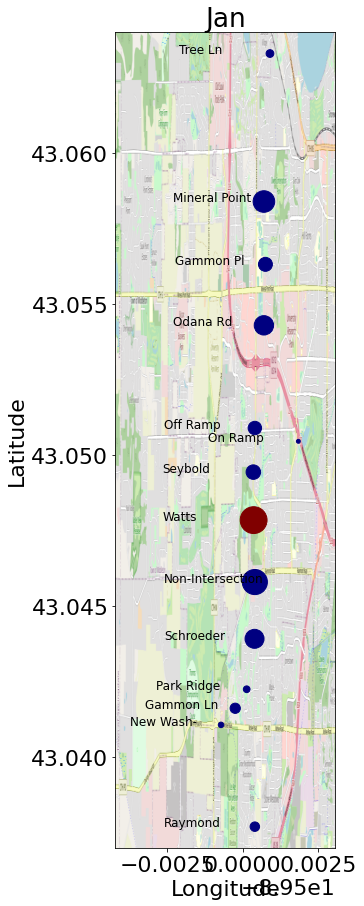

In [44]:
test1 = copy.copy(fsgammon_df)
test1 = test1.sort_values(by='Latitude', ascending=False)
test1['belt'] = beltline
test1['Longitude'] += 0.0035
test1['Latitude'] -= 0.0023

df = test1
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 15), squeeze=False)
df.plot(ax=axs[0,0], kind='scatter', x='Longitude', y='Latitude', title='Jan',
        s=df['Jun']*15, c='belt', cmap=plt.get_cmap("jet"), colorbar=False)#, bbox=BBox)


axs[0, 0].imshow(sgammon_map, extent=BBox1, aspect='equal')

for k in range(len(test1)):
#    axs[0, 0].text(test1.iloc[k]['Longitude'] - -0.003*((-1)**(k%2)), test1.iloc[k]['Latitude'] , geolst[k], fontsize=12)
    axs[0, 0].text(test1.iloc[k]['Longitude'] - 0.003, test1.iloc[k]['Latitude'] , geolst[k], fontsize=12)

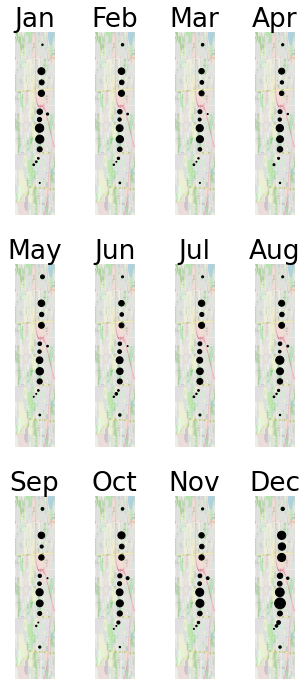

In [45]:
df = test1
scale=1
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 10), squeeze=False)
    
df.plot(ax=axs[0,0], kind="scatter", x="Longitude" , y="Latitude", title='Jan',
                       s=df['Jan']*scale, color='0'
                       )
axs[0, 0].imshow(sgammon_map, extent=BBox)
axs[0, 0].set_yticks([])
axs[0, 0].set_xticks([])
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

df.plot(ax=axs[0, 1], kind="scatter", x="Longitude", y="Latitude", title='Feb',
                       s=df['Feb']*scale, color='0'
                      )
axs[0, 1].imshow(sgammon_map, extent=BBox)
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')

df.plot(ax=axs[0, 2], kind="scatter", x="Longitude", y="Latitude", title='Mar', 
                       s=df['Mar']*scale, color='0'
                      )
axs[0, 2].imshow(sgammon_map, extent=BBox)
axs[0, 2].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')

df.plot(ax=axs[0, 3], kind="scatter", x="Longitude", y="Latitude", title='Apr',
                       s=df['Apr']*scale, color = '0'
                      )
axs[0, 3].imshow(sgammon_map, extent=BBox)
axs[0, 3].set_yticks([])
axs[0, 3].set_xticks([])
axs[0, 3].set_ylabel('')
axs[0, 3].set_xlabel('')

df.plot(ax=axs[1, 0], kind="scatter", x="Longitude", y="Latitude", title='May',
                       s=df['May']*scale, color='0'
                      )
axs[1, 0].imshow(sgammon_map, extent=BBox)
axs[1, 0].set_yticks([])
axs[1, 0].set_xticks([])
axs[1, 0].set_ylabel('')
axs[1, 0].set_xlabel('')

df.plot(ax=axs[1, 1], kind="scatter", x="Longitude", y="Latitude", title='Jun',
                       s=df['Jun']*scale, color ='0'
                      )
axs[1, 1].imshow(sgammon_map, extent=BBox)
axs[1, 1].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlabel('')

df.plot(ax=axs[1, 2], kind="scatter", x="Longitude", y="Latitude", title='Jul',
                       s=df['Jul']*scale, color='0'
                      )
axs[1, 2].imshow(sgammon_map, extent=BBox)
axs[1, 2].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_ylabel('')
axs[1, 2].set_xlabel('')

df.plot(ax=axs[1, 3], kind="scatter", x="Longitude", y="Latitude", title='Aug', 
                       s=df['Aug']*scale, color ='0'
                      )
axs[1, 3].imshow(sgammon_map, extent=BBox)
axs[1, 3].set_yticks([])
axs[1, 3].set_xticks([])
axs[1, 3].set_ylabel('')
axs[1, 3].set_xlabel('')

df.plot(ax=axs[2, 0], kind="scatter", x="Longitude", y="Latitude", title='Sep',
                       s=df['Sep']*scale, color='0'
                      )
axs[2, 0].imshow(sgammon_map, extent=BBox)
axs[2, 0].set_yticks([])
axs[2, 0].set_xticks([])
axs[2, 0].set_ylabel('')
axs[2, 0].set_xlabel('')

df.plot(ax=axs[2, 1], kind="scatter", x="Longitude", y="Latitude", title='Oct',
                       s=df['Oct']*scale, color='0'
                      )
axs[2, 1].imshow(sgammon_map, extent=BBox)
axs[2, 1].set_yticks([])
axs[2, 1].set_xticks([])
axs[2, 1].set_ylabel('')
axs[2, 1].set_xlabel('')

df.plot(ax=axs[2, 2], kind="scatter", x="Longitude", y="Latitude", title='Nov',
                       s=df['Nov']*scale, color='0'
                      )

axs[2, 2].imshow(sgammon_map, extent=BBox)
axs[2, 2].set_yticks([])
axs[2, 2].set_xticks([])
axs[2, 2].set_ylabel('')
axs[2, 2].set_xlabel('')

df.plot(ax=axs[2, 3], kind="scatter", x="Longitude", y="Latitude", title='Dec', 
                       s=df['Dec']*scale, color='0'
                      )
axs[2, 3].imshow(sgammon_map, extent=BBox)
axs[2, 3].set_yticks([])
axs[2, 3].set_xticks([])
axs[2, 3].set_ylabel('')
axs[2, 3].set_xlabel('')

for i in range(3):
#    axs[i, 0].text(-89.501, 43.06, 'Tree', fontsize=12)
#    axs[i, 0].text(-89.51, 43.059, 'Mineral', fontsize=12)
#    axs[i, 0].text(-89.502, 43.057, 'Odana', fontsize=12)
#    axs[i, 0].text(-89.51, 43.053, 'Beltline', fontsize=12)
#    axs[i, 0].text(-89.502, 43.0525, 'Ramp', fontsize=12)
#    axs[i, 0].text(-89.51, 43.0515, 'Seybold', fontsize=12)
#    axs[i, 0].text(-89.502, 43.05, 'Watts', fontsize=12)
#    axs[i, 0].text(-89.512, 43.0478, 'Gammon', fontsize=12)
#    axs[i, 0].text(-89.5025, 43.0465, 'Schroeder', fontsize=10)
#    axs[i, 0].text(-89.511, 43.0451, 'Park Ridge', fontsize=10)
#    axs[i, 0].text(-89.505, 43.0431, 'New Wash-', fontsize=10)
#    axs[i, 0].text(-89.51, 43.04, 'Raymond', fontsize=10)
    for j in range(4):
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=-0.9, hspace=-0.4)
plt.tight_layout()
#plt.savefig('geoplot.pdf')

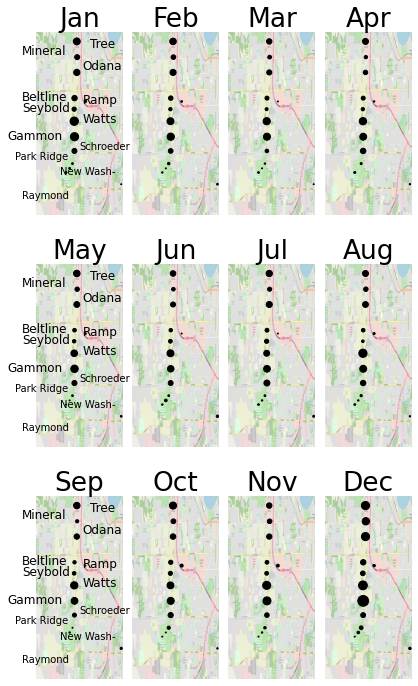

In [46]:
#norm
df = fix_df(sgammon_df)
scale=1
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 10), squeeze=False)
    
df.plot(ax=axs[0,0], kind="scatter", x="Longitude" , y="Latitude", title='Jan',
                       s=df['Jan']*scale, color='0'
                       )
axs[0, 0].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[0, 0].set_yticks([])
axs[0, 0].set_xticks([])
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

df.plot(ax=axs[0, 1], kind="scatter", x="Longitude", y="Latitude", title='Feb',
                       s=df['Feb']*scale, color='0'
                      )
axs[0, 1].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')

df.plot(ax=axs[0, 2], kind="scatter", x="Longitude", y="Latitude", title='Mar', 
                       s=df['Mar']*scale, color='0'
                      )
axs[0, 2].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[0, 2].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')

df.plot(ax=axs[0, 3], kind="scatter", x="Longitude", y="Latitude", title='Apr',
                       s=df['Apr']*scale, color = '0'
                      )
axs[0, 3].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[0, 3].set_yticks([])
axs[0, 3].set_xticks([])
axs[0, 3].set_ylabel('')
axs[0, 3].set_xlabel('')

df.plot(ax=axs[1, 0], kind="scatter", x="Longitude", y="Latitude", title='May',
                       s=df['May']*scale, color='0'
                      )
axs[1, 0].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[1, 0].set_yticks([])
axs[1, 0].set_xticks([])
axs[1, 0].set_ylabel('')
axs[1, 0].set_xlabel('')

df.plot(ax=axs[1, 1], kind="scatter", x="Longitude", y="Latitude", title='Jun',
                       s=df['Jun']*scale, color ='0'
                      )
axs[1, 1].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[1, 1].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlabel('')

df.plot(ax=axs[1, 2], kind="scatter", x="Longitude", y="Latitude", title='Jul',
                       s=df['Jul']*scale, color='0'
                      )
axs[1, 2].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[1, 2].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_ylabel('')
axs[1, 2].set_xlabel('')

df.plot(ax=axs[1, 3], kind="scatter", x="Longitude", y="Latitude", title='Aug', 
                       s=df['Aug']*scale, color ='0'
                      )
axs[1, 3].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[1, 3].set_yticks([])
axs[1, 3].set_xticks([])
axs[1, 3].set_ylabel('')
axs[1, 3].set_xlabel('')

df.plot(ax=axs[2, 0], kind="scatter", x="Longitude", y="Latitude", title='Sep',
                       s=df['Sep']*scale, color='0'
                      )
axs[2, 0].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[2, 0].set_yticks([])
axs[2, 0].set_xticks([])
axs[2, 0].set_ylabel('')
axs[2, 0].set_xlabel('')

df.plot(ax=axs[2, 1], kind="scatter", x="Longitude", y="Latitude", title='Oct',
                       s=df['Oct']*scale, color='0'
                      )
axs[2, 1].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[2, 1].set_yticks([])
axs[2, 1].set_xticks([])
axs[2, 1].set_ylabel('')
axs[2, 1].set_xlabel('')

df.plot(ax=axs[2, 2], kind="scatter", x="Longitude", y="Latitude", title='Nov',
                       s=df['Nov']*scale, color='0'
                      )

axs[2, 2].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[2, 2].set_yticks([])
axs[2, 2].set_xticks([])
axs[2, 2].set_ylabel('')
axs[2, 2].set_xlabel('')

df.plot(ax=axs[2, 3], kind="scatter", x="Longitude", y="Latitude", title='Dec', 
                       s=df['Dec']*scale, color='0'
                      )
axs[2, 3].imshow(sgammon_map, extent=[-89.5082, -89.4967, 43.0378, 43.0619])
axs[2, 3].set_yticks([])
axs[2, 3].set_xticks([])
axs[2, 3].set_ylabel('')
axs[2, 3].set_xlabel('')

for i in range(3):
    axs[i, 0].text(-89.501, 43.06, 'Tree', fontsize=12)
    axs[i, 0].text(-89.51, 43.059, 'Mineral', fontsize=12)
    axs[i, 0].text(-89.502, 43.057, 'Odana', fontsize=12)
    axs[i, 0].text(-89.51, 43.053, 'Beltline', fontsize=12)
    axs[i, 0].text(-89.502, 43.0525, 'Ramp', fontsize=12)
    axs[i, 0].text(-89.51, 43.0515, 'Seybold', fontsize=12)
    axs[i, 0].text(-89.502, 43.05, 'Watts', fontsize=12)
    axs[i, 0].text(-89.512, 43.0478, 'Gammon', fontsize=12)
    axs[i, 0].text(-89.5025, 43.0465, 'Schroeder', fontsize=10)
    axs[i, 0].text(-89.511, 43.0451, 'Park Ridge', fontsize=10)
    axs[i, 0].text(-89.505, 43.0431, 'New Wash-', fontsize=10)
    axs[i, 0].text(-89.51, 43.04, 'Raymond', fontsize=10)
    for j in range(4):
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['bottom'].set_visible(False)
        axs[i, j].spines['left'].set_visible(False)
        
plt.subplots_adjust(wspace=-0.9, hspace=-0.4)
plt.tight_layout()
#plt.savefig('geoplot.pdf')

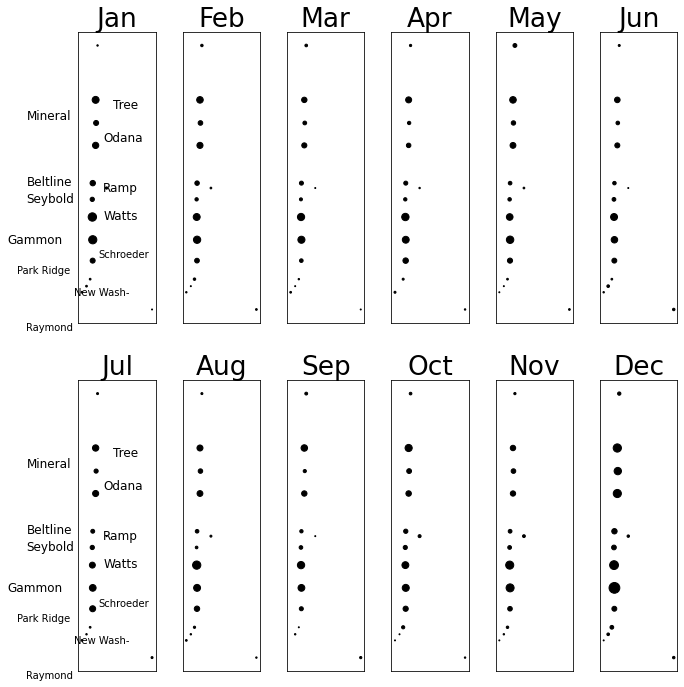

In [47]:
#no map
df = fix_df(sgammon_df)
scale=1
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(10, 10), squeeze=False)
    
df.plot(ax=axs[0,0], kind="scatter", x="Longitude" , y="Latitude", title='Jan',
                       s=df['Jan']*scale, color='0'
                       )
axs[0, 0].set_yticks([])
axs[0, 0].set_xticks([])
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

df.plot(ax=axs[0, 1], kind="scatter", x="Longitude", y="Latitude", title='Feb',
                       s=df['Feb']*scale, color='0'
                      )
axs[0, 1].set_yticks([])
axs[0, 1].set_xticks([])
axs[0, 1].set_ylabel('')
axs[0, 1].set_xlabel('')

df.plot(ax=axs[0, 2], kind="scatter", x="Longitude", y="Latitude", title='Mar', 
                       s=df['Mar']*scale, color='0'
                      )
axs[0, 2].set_yticks([])
axs[0, 2].set_xticks([])
axs[0, 2].set_ylabel('')
axs[0, 2].set_xlabel('')

df.plot(ax=axs[0, 3], kind="scatter", x="Longitude", y="Latitude", title='Apr',
                       s=df['Apr']*scale, color = '0'
                      )
axs[0, 3].set_yticks([])
axs[0, 3].set_xticks([])
axs[0, 3].set_ylabel('')
axs[0, 3].set_xlabel('')

df.plot(ax=axs[0, 4], kind="scatter", x="Longitude", y="Latitude", title='May',
                       s=df['May']*scale, color='0'
                      )
axs[0, 4].set_yticks([])
axs[0, 4].set_xticks([])
axs[0, 4].set_ylabel('')
axs[0, 4].set_xlabel('')

df.plot(ax=axs[0, 5], kind="scatter", x="Longitude", y="Latitude", title='Jun',
                       s=df['Jun']*scale, color ='0'
                      )
axs[0, 5].set_yticks([])
axs[0, 5].set_xticks([])
axs[0, 5].set_ylabel('')
axs[0, 5].set_xlabel('')

df.plot(ax=axs[1, 0], kind="scatter", x="Longitude", y="Latitude", title='Jul',
                       s=df['Jul']*scale, color='0'
                      )
axs[1, 0].set_yticks([])
axs[1, 0].set_xticks([])
axs[1, 0].set_ylabel('')
axs[1, 0].set_xlabel('')

df.plot(ax=axs[1, 1], kind="scatter", x="Longitude", y="Latitude", title='Aug', 
                       s=df['Aug']*scale, color ='0'
                      )
axs[1, 1].set_yticks([])
axs[1, 1].set_xticks([])
axs[1, 1].set_ylabel('')
axs[1, 1].set_xlabel('')

df.plot(ax=axs[1, 2], kind="scatter", x="Longitude", y="Latitude", title='Sep',
                       s=df['Sep']*scale, color='0'
                      )
axs[1, 2].set_yticks([])
axs[1, 2].set_xticks([])
axs[1, 2].set_ylabel('')
axs[1, 2].set_xlabel('')

df.plot(ax=axs[1, 3], kind="scatter", x="Longitude", y="Latitude", title='Oct',
                       s=df['Oct']*scale, color='0'
                      )
axs[1, 3].set_yticks([])
axs[1, 3].set_xticks([])
axs[1, 3].set_ylabel('')
axs[1, 3].set_xlabel('')

df.plot(ax=axs[1, 4], kind="scatter", x="Longitude", y="Latitude", title='Nov',
                       s=df['Nov']*scale, color='0'
                      )

axs[1, 4].set_yticks([])
axs[1, 4].set_xticks([])
axs[1, 4].set_ylabel('')
axs[1, 4].set_xlabel('')

df.plot(ax=axs[1, 5], kind="scatter", x="Longitude", y="Latitude", title='Dec', 
                       s=df['Dec']*scale, color='0'
                      )
axs[1, 5].set_yticks([])
axs[1, 5].set_xticks([])
axs[1, 5].set_ylabel('')
axs[1, 5].set_xlabel('')

for i in range(2):
    axs[i, 0].text(-89.501, 43.06, 'Tree', fontsize=12)
    axs[i, 0].text(-89.51, 43.059, 'Mineral', fontsize=12)
    axs[i, 0].text(-89.502, 43.057, 'Odana', fontsize=12)
    axs[i, 0].text(-89.51, 43.053, 'Beltline', fontsize=12)
    axs[i, 0].text(-89.502, 43.0525, 'Ramp', fontsize=12)
    axs[i, 0].text(-89.51, 43.0515, 'Seybold', fontsize=12)
    axs[i, 0].text(-89.502, 43.05, 'Watts', fontsize=12)
    axs[i, 0].text(-89.512, 43.0478, 'Gammon', fontsize=12)
    axs[i, 0].text(-89.5025, 43.0465, 'Schroeder', fontsize=10)
    axs[i, 0].text(-89.511, 43.0451, 'Park Ridge', fontsize=10)
    axs[i, 0].text(-89.505, 43.0431, 'New Wash-', fontsize=10)
    axs[i, 0].text(-89.51, 43.04, 'Raymond', fontsize=10)
    #for j in range(6):
    #    axs[i, j].spines['right'].set_visible(False)
    #    axs[i, j].spines['top'].set_visible(False)
    #    axs[i, j].spines['bottom'].set_visible(False)
    #    axs[i, j].spines['left'].set_visible(False)
        
#plt.subplots_adjust(wspace=-0.9, hspace=-0.4)
plt.tight_layout()
#plt.savefig('geoplot.pdf')

In [48]:
test_df = copy.copy(fsgammon_df)
test_df.sort_values(by=['Latitude'], ascending=False)
test_map = plt.imread(r"C:\Users\tente\OneDrive\Documents\CS638\testmap.png")

In [49]:
lonmin = fsgammon_df['Longitude'] .min()
lonmax = fsgammon_df['Longitude'] .max()
latmin = fsgammon_df['Latitude'] .min()
latmax = fsgammon_df['Latitude'].max()

In [50]:
tBBox = ((lonmin, lonmax, latmin, latmax))

Text(0.5, 0, '')

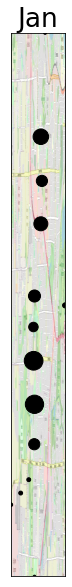

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), squeeze=False)
    
test_df.plot(ax=axs[0,0], kind="scatter", x="Longitude" , y="Latitude", title='Jan',
                       s=test_df['Jan']*5, color='0'
                       )
axs[0, 0].imshow(test_map, extent=tBBox, aspect='equal')
axs[0, 0].set_yticks([])
axs[0, 0].set_xticks([])
axs[0, 0].set_ylabel('')
axs[0, 0].set_xlabel('')

In [52]:
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), squeeze=False)
# #bad allignment
# for o in range(1):
#     xoffset = -0.003
#     yoffset = 0.01*o
#     test_df['Longitude'] -= xoffset
#     test_df['Latitude'] -= yoffset
#     ax=get_ax()
#     test_df.plot(ax=ax, title=yoffset, kind="scatter", x="Longitude", y="Latitude", figsize=(4, 6),
#                  s=sgammon_df['Jan']*5, color = '0')
#     plt.imshow(sgammon_map, extent=[-89.5082-xoffset, -89.4967-xoffset, 43.0378-yoffset, 43.0619-yoffset], aspect='equal')
#     plt.axis('off')

#     i=0
#     j=0
#     while i <= 1:
#         i += 1
#         continue
#         while j <= 1:
#             ax.text(-89.501-xoffset, 43.061-yoffset, 'Tree')
#             ax.text(-89.512-xoffset, 43.059-yoffset, 'Mineral')
#             ax.text(-89.5015-xoffset, 43.0569-yoffset, 'Odana')
#             ax.text(-89.512-xoffset, 43.053-yoffset, 'Beltline')
#             ax.text(-89.501-xoffset, 43.0525-yoffset, 'Ramp')
#             ax.text(-89.513-xoffset, 43.0515-yoffset, 'Seybold')
#             ax.text(-89.502-xoffset, 43.05-yoffset, 'Watts')
#             ax.text(-89.512-xoffset, 43.0475-yoffset, 'Gammon')
#             ax.text(-89.502-xoffset, 43.0463-yoffset, 'Schroeder')
#             j += 1
#         i +=1

In [63]:
fact_dict= {}
for i, row in all_data[['DRVRPC1', 'DRVRPC2', 'TOTINJ', 'TOTFATL']].iterrows():
    inj = row[2]
    fat = row[3]
    if type(row[0]) == float:
        if row[0] not in fact_dict:
            fact_dict[row[0]] = {}
            fact_dict[row[0]]['Collisions'] = 1
            fact_dict[row[0]]['Injuries'] = inj
            fact_dict[row[0]]['Fatalities'] = fat
        else:
            fact_dict[row[0]]['Collisions'] += 1
            fact_dict[row[0]]['Injuries'] += inj
            fact_dict[row[0]]['Fatalities'] += fat
    if type(row[0]) == str:
        factlst0=row[0].split(',')
        for fact in factlst0:
            if fact not in fact_dict:
                fact_dict[fact] = {}
                fact_dict[fact]['Collisions'] = 1
                fact_dict[fact]['Injuries'] = inj
                fact_dict[fact]['Fatalities'] = fat
            else:
                fact_dict[fact]['Collisions'] += 1
                fact_dict[fact]['Injuries'] += inj
                fact_dict[fact]['Fatalities'] += fat
    if type(row[1]) == float:
        if row[1] not in fact_dict:
            fact_dict[row[1]] = {}
            fact_dict[row[1]]['Collisions'] = 1
            fact_dict[row[1]]['Injuries'] = inj
            fact_dict[row[1]]['Fatalities'] = fat
        else:
            fact_dict[row[1]]['Collisions'] += 1
            fact_dict[row[1]]['Injuries'] += inj
            fact_dict[row[1]]['Fatalities'] += fat
    if type(row[1]) == str:
        factlst1=row[1].split(',')
        for fact in factlst1:
            if fact not in fact_dict:
                fact_dict[fact] = {}
                fact_dict[fact]['Collisions'] = 1
                fact_dict[fact]['Injuries'] = inj
                fact_dict[fact]['Fatalities'] = fat
            else:
                fact_dict[fact]['Collisions'] += 1
                fact_dict[fact]['Injuries'] += inj
                fact_dict[fact]['Fatalities'] += fat
for key in fact_dict:
    fact_dict[key]['Collisions'] = fact_dict[key]['Collisions'] / 1000
    fact_dict[key]['Injuries'] = fact_dict[key]['Injuries'] / 1000
    fact_dict[key]['Fatalities'] = fact_dict[key]['Fatalities'] / 1000
    fact_dict[key]['Injuries per Crash'] = fact_dict[key]['Injuries'] / fact_dict[key]['Collisions']
    fact_dict[key]['Fatalities per Crash'] = fact_dict[key]['Fatalities'] / fact_dict[key]['Collisions']

In [66]:
fact_df = DataFrame.from_dict(fact_dict, orient='index')

In [67]:
fact_df = fact_df.drop([np.nan])

In [68]:
fact_df = fact_df.rename(index={'FVC':'Failure to Keep Control', 'ID':'Inattentive Driving', 'FTY':'Failure to Yield', 'TFC': 'Too Fast for Conditions', 'FTC':'Following Too Closely', 'OTHR':'Other', 'IT':'Improper Turn', 'SPD':'Speeding', 'IO':'Improper Overtake', 'DC': 'Driver Condition', 'DTC':'Disregard Traffic Control', 'DIS':'Physical Disability', 'UB':'Unsafe Breaking', 'LOC':'Left of Center'})

In [69]:
fact_df = fact_df.sort_values(by='Collisions', ascending=False)

In [70]:
fact_df

,Collisions,Injuries,Fatalities,Injuries per Crash,Fatalities per Crash
Failure to Yield,28.823,15.289,0.030,0.530444,0.001041
Inattentive Driving,21.135,10.764,0.026,0.509297,0.001230
Following Too Closely,18.063,8.094,0.003,0.448098,0.000166
Failure to Keep Control,15.111,6.805,0.067,0.450334,0.004434
Other,9.250,3.831,0.031,0.414162,0.003351
Too Fast for Conditions,8.819,3.848,0.030,0.436331,0.003402
Disregard Traffic Control,7.874,5.344,0.016,0.678689,0.002032
Improper Turn,6.610,1.785,0.005,0.270045,0.000756
Driver Condition,5.608,3.622,0.046,0.645863,0.008203
Speeding,2.908,2.049,0.074,0.704608,0.025447


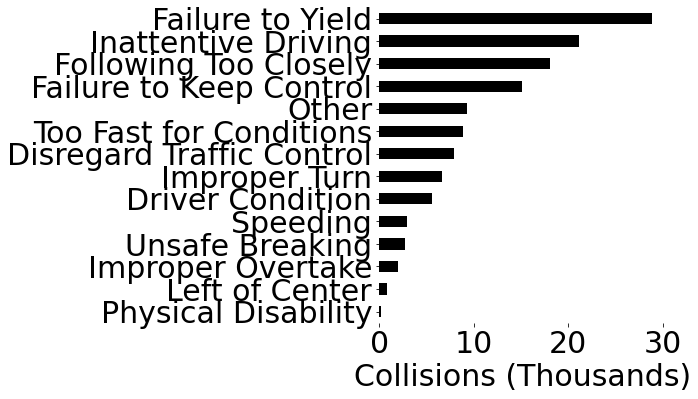

In [71]:
ax=get_ax((10, 6))
font=30
fact_df = fact_df.sort_values(by='Collisions')
fact_df['Collisions'].plot.barh(color='0')
plt.xlabel('Collisions (Thousands)', size=font)
plt.xticks(size=font)
plt.yticks(size=font)
plt.tight_layout()
plt.savefig('dvrfactor_cratot.pdf')

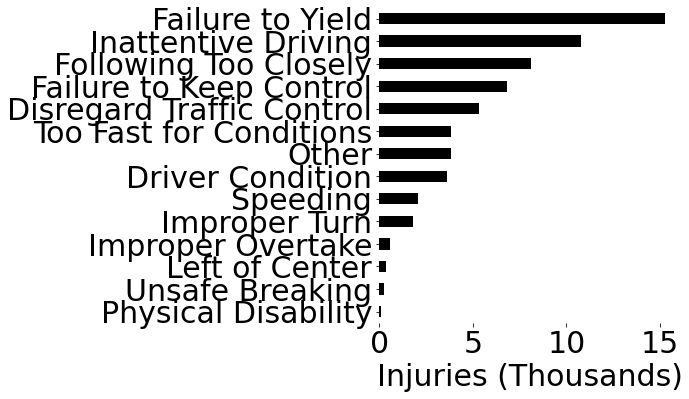

In [72]:
ax=get_ax((10, 6))
font=30
fact_df = fact_df.sort_values(by='Injuries')
fact_df['Injuries'].plot.barh(color='0')
plt.xlabel('Injuries (Thousands)', size=font)
plt.xticks(size=font)
plt.yticks(size=font)
plt.tight_layout()
plt.savefig('dvrfactor_injtot.pdf')

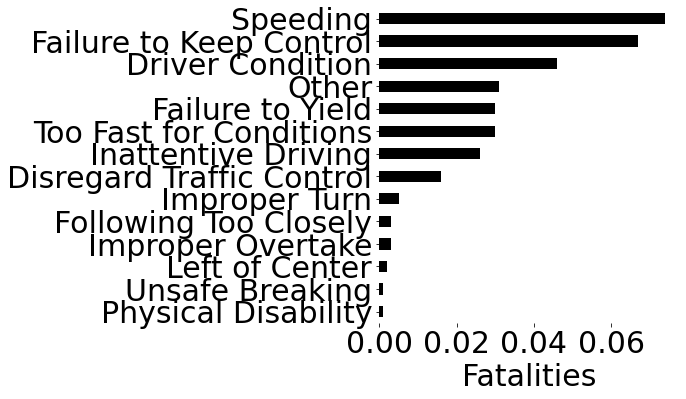

In [73]:
ax=get_ax((10, 6))
font=30
fact_df = fact_df.sort_values(by='Fatalities')
fact_df['Fatalities'].plot.barh(color='0')
plt.xlabel('Fatalities', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.tight_layout()
plt.savefig('dvrfactor_fattot.pdf')

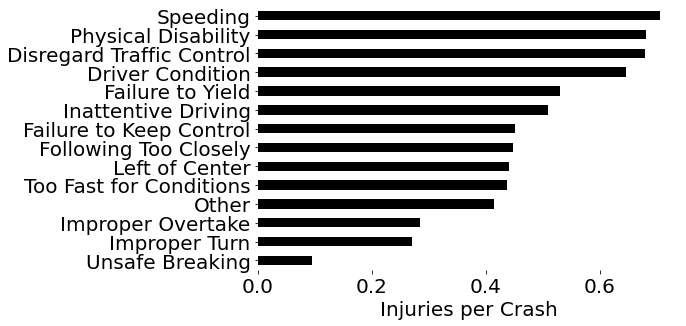

In [74]:
ax=get_ax((10, 5))
fact_df = fact_df.sort_values('Injuries per Crash')
fact_df['Injuries per Crash'].plot.barh(color='0')
plt.xlabel('Injuries per Crash', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig('dvrfactor_injrat.pdf')

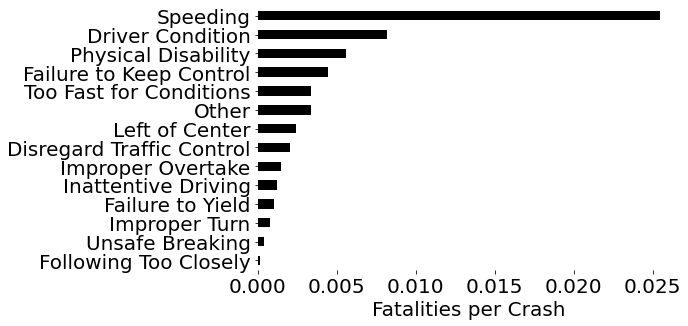

In [75]:
ax=get_ax((10, 5))
fact_df = fact_df.sort_values('Fatalities per Crash')
fact_df['Fatalities per Crash'].plot.barh(color='0')
plt.xlabel('Fatalities per Crash', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.tight_layout()
plt.savefig('dvrfactor_fatrat.pdf')

In [76]:
factor_list = []
for i, row in all_data[['DRVRPC1']].iterrows():
    factstr = row[0]
    if type(factstr) == float:
        if factstr not in factor_list:
            factor_list.append(row[0])
    else:
        factlst = factstr.split(',')
        for fact in factlst:
            if fact not in factor_list:
                factor_list.append(fact)
    if len(factor_list) == 16:
        break

In [77]:
sgammonplus_dict = {}          #gives empty dict of inters from sgammon_df and dvrfactors
for inter in sgammon_df.index:
    sgammonplus_dict[inter] = {}
    for fact in factor_list:
        sgammonplus_dict[inter][fact] = 0

In [78]:
for i, row in all_data[['ONSTR', 'ATSTR', 'DRVRPC1', 'DRVRPC2']].iterrows():
    inter=(row[0], row[1])
    if inter in sgammonplus_dict:
        dfactstr0 = row[2]
        if type(dfactstr0) == float:
            fact = np.nan
            sgammonplus_dict[inter][fact] += 1
        else:
            factlst0 = dfactstr0.split(',')
            for fact in factlst0:
                sgammonplus_dict[inter][fact] += 1
        dfactstr1 = row[3]
        if type(dfactstr1) == float:
            fact = np.nan
            sgammonplus_dict[inter][fact] += 1
        else:
            factlst1 = dfactstr1.split(',')
            for fact in factlst1:
                sgammonplus_dict[inter][fact] += 1

In [79]:
sgammonbar_dict = {}
for inter in sgammonplus_dict.keys():
    sgammonbar_dict[inter] = {}
    for key in sgammonplus_dict[inter].keys():
        if type(key) == float:
            sgammonbar_dict[inter]['Not Recorded'] = sgammonplus_dict[inter][np.nan]
        elif key =='FTY':
            sgammonbar_dict[inter]['Failure to Yield'] = sgammonplus_dict[inter]['FTY']
        elif key == 'FTC':
            sgammonbar_dict[inter]['Follow too Closely'] = sgammonplus_dict[inter]['FTC']
        else:
            pass
            if 'Other' not in sgammonbar_dict[inter]:
                sgammonbar_dict[inter]['Other'] = 0
            sgammonbar_dict[inter]['Other'] += sgammonplus_dict[inter][key]
#sgammonbar_dict

In [80]:
sgammonbar_df = fix_df(DataFrame.from_dict(sgammonbar_dict, orient='index'))
sgammonbar_df = sgammonbar_df[['Not Recorded', 'Failure to Yield', 'Follow too Closely', 'Other']]
sgammonbar1_df = fix_df(DataFrame.from_dict(sgammonplus_dict, orient='index'))

In [81]:
sgammonbar_df

,Not Recorded,Failure to Yield,Follow too Closely,Other
"S GAMMON RD, WATTS RD",733,287,64,289
S GAMMON RD,780,67,208,372
"MINERAL POINT RD, S GAMMON RD",514,207,63,252
"S GAMMON RD, ODANA RD",449,72,84,247
"S GAMMON RD, SCHROEDER RD",321,42,81,173
"S GAMMON RD, GAMMON PL",266,119,30,97
"S GAMMON RD, SEYBOLD RD",183,11,53,99
"S GAMMON RD, W BELTLINE HWY",231,26,40,143
"S GAMMON RD, TREE LN",87,26,16,34
"S GAMMON RD, PARK RIDGE DR",68,13,9,35


In [82]:
sgammonbar1_df[['SPD']].sum()

SPD    29
dtype: int64

In [83]:
sgammonbar_df#.index

,Not Recorded,Failure to Yield,Follow too Closely,Other
"S GAMMON RD, WATTS RD",733,287,64,289
S GAMMON RD,780,67,208,372
"MINERAL POINT RD, S GAMMON RD",514,207,63,252
"S GAMMON RD, ODANA RD",449,72,84,247
"S GAMMON RD, SCHROEDER RD",321,42,81,173
"S GAMMON RD, GAMMON PL",266,119,30,97
"S GAMMON RD, SEYBOLD RD",183,11,53,99
"S GAMMON RD, W BELTLINE HWY",231,26,40,143
"S GAMMON RD, TREE LN",87,26,16,34
"S GAMMON RD, PARK RIDGE DR",68,13,9,35


In [84]:
names = []
for idx in sgammonbar_df.index:
    if idx == 'S GAMMON RD':
        pass
        #if idx not in names:
        #    names.append(idx)
    else:
        idxlst = idx.split(',')
        for road in idxlst:
            #print(road)
            if road not in names:
                #print(road, type(road))# road == 'S GAMMON RD')
                names.append(road)
names.pop(3)
test_sgammonbar = copy.copy(sgammonbar_df)
#names[0], names[1] = names[1], names[0]
test_sgammonbar.index = names

In [85]:
names

['S GAMMON RD',
 ' WATTS RD',
 'MINERAL POINT RD',
 ' ODANA RD',
 ' SCHROEDER RD',
 ' GAMMON PL',
 ' SEYBOLD RD',
 ' W BELTLINE HWY',
 ' TREE LN',
 ' PARK RIDGE DR',
 ' RAMP',
 'RAYMOND RD',
 ' GAMMON LN',
 ' NEW WASHBURN WAY']

In [86]:
test_sgammonbar = copy.copy(sgammonbar_df)
test_sgammonbar.index = [' WATTS RD', 'S GAMMON RD', 'MINERAL POINT RD',
       ' ODANA RD', ' SCHROEDER RD',
       'GAMMON PL', ' SEYBOLD RD',
       ' W BELTLINE HWY', ' TREE LN',
       ' PARK RIDGE DR', ' RAMP',
       'RAYMOND RD', ' GAMMON LN',
       ' NEW WASHBURN WAY']

In [87]:
sgammonbar_df

,Not Recorded,Failure to Yield,Follow too Closely,Other
"S GAMMON RD, WATTS RD",733,287,64,289
S GAMMON RD,780,67,208,372
"MINERAL POINT RD, S GAMMON RD",514,207,63,252
"S GAMMON RD, ODANA RD",449,72,84,247
"S GAMMON RD, SCHROEDER RD",321,42,81,173
"S GAMMON RD, GAMMON PL",266,119,30,97
"S GAMMON RD, SEYBOLD RD",183,11,53,99
"S GAMMON RD, W BELTLINE HWY",231,26,40,143
"S GAMMON RD, TREE LN",87,26,16,34
"S GAMMON RD, PARK RIDGE DR",68,13,9,35


In [88]:
test_sgammonbar

,Not Recorded,Failure to Yield,Follow too Closely,Other
WATTS RD,733,287,64,289
S GAMMON RD,780,67,208,372
MINERAL POINT RD,514,207,63,252
ODANA RD,449,72,84,247
SCHROEDER RD,321,42,81,173
GAMMON PL,266,119,30,97
SEYBOLD RD,183,11,53,99
W BELTLINE HWY,231,26,40,143
TREE LN,87,26,16,34
PARK RIDGE DR,68,13,9,35


In [89]:
test_sgammonbar = test_sgammonbar.reindex(['S GAMMON RD',' WATTS RD',  'MINERAL POINT RD',
       ' ODANA RD', ' SCHROEDER RD',
       'GAMMON PL', ' SEYBOLD RD',
       ' W BELTLINE HWY', ' TREE LN',
       ' PARK RIDGE DR', ' RAMP',
       'RAYMOND RD', ' GAMMON LN',
       ' NEW WASHBURN WAY'])

In [90]:
test_sgammonbar.iloc[1:4]

,Not Recorded,Failure to Yield,Follow too Closely,Other
WATTS RD,733,287,64,289
MINERAL POINT RD,514,207,63,252
ODANA RD,449,72,84,247


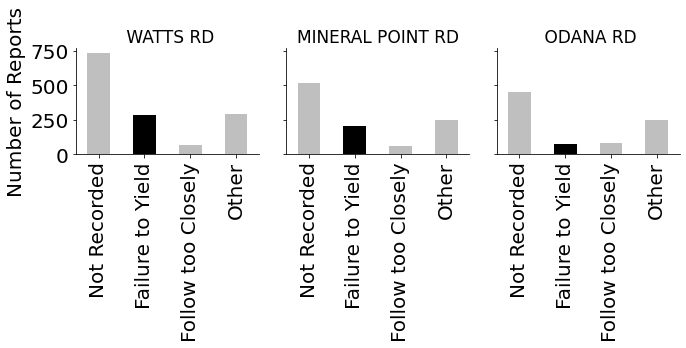

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
plt.setp(axs, yticks=[0, 250, 500, 750])
df = test_sgammonbar.iloc[1:4]
count=0
rownum=0
while rownum < 1:
    colnum = 0
    while colnum < 3:
        name = df.index[count]
        df.loc[name].plot.bar(ax = axs[colnum], color=['0.75', '0', '0.75', '0.75'])
        axs[colnum].set_title(name, size=17)
        
        axs[colnum].tick_params(axis='x', labelsize=20)
        axs[colnum].tick_params(axis='y', labelsize=20)
        axs[colnum].spines['right'].set_visible(False)
        axs[colnum].spines['top'].set_visible(False)
        colnum += 1
        count += 1
    rownum += 1
i = 0
while i <= 2:
    axs[i].set_ylabel('Number of Reports', size=20)
    i += 1
plt.tight_layout()
plt.savefig('dvrfactors1.pdf')
# FTC is kinda a catch-all for drivers fault

In [92]:
test_sgammonbar

,Not Recorded,Failure to Yield,Follow too Closely,Other
S GAMMON RD,780,67,208,372
WATTS RD,733,287,64,289
MINERAL POINT RD,514,207,63,252
ODANA RD,449,72,84,247
SCHROEDER RD,321,42,81,173
GAMMON PL,266,119,30,97
SEYBOLD RD,183,11,53,99
W BELTLINE HWY,231,26,40,143
TREE LN,87,26,16,34
PARK RIDGE DR,68,13,9,35


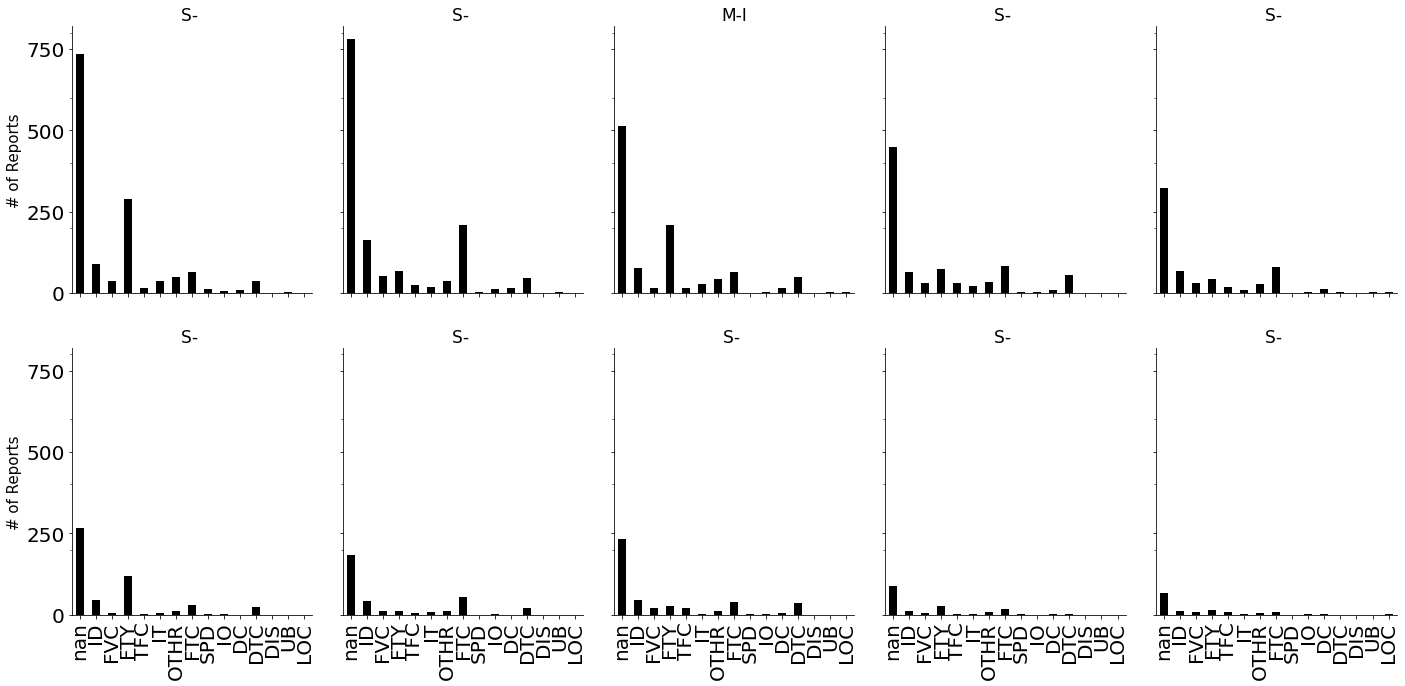

In [93]:
fig, axs = plt.subplots(2, 5, figsize=(20, 10), sharex=True, sharey=True)
plt.setp(axs, yticks=[0, 250, 500, 750])
count=0
rownum=0
while rownum < 2:
    colnum = 0
    while colnum < 5:
        name = sgammonbar1_df.index[count]
        sgammonbar1_df.loc[name].plot.bar(ax = axs[rownum, colnum], color='0')
        axs[rownum, colnum].set_title(str(name[0]) + '-'+ str(name[1]), size=17)
        axs[rownum, colnum].tick_params(axis='x', labelsize=20)
        axs[rownum, colnum].tick_params(axis='y', labelsize=20)
        axs[rownum, colnum].spines['right'].set_visible(False)
        axs[rownum, colnum].spines['top'].set_visible(False)
        colnum += 1
        count += 1
    rownum += 1
i = 0
while i <= 1:
    axs[i, 0].set_ylabel('# of Reports', size=15)
    i += 1
plt.tight_layout()
plt.savefig('dvrfactors1.pdf')

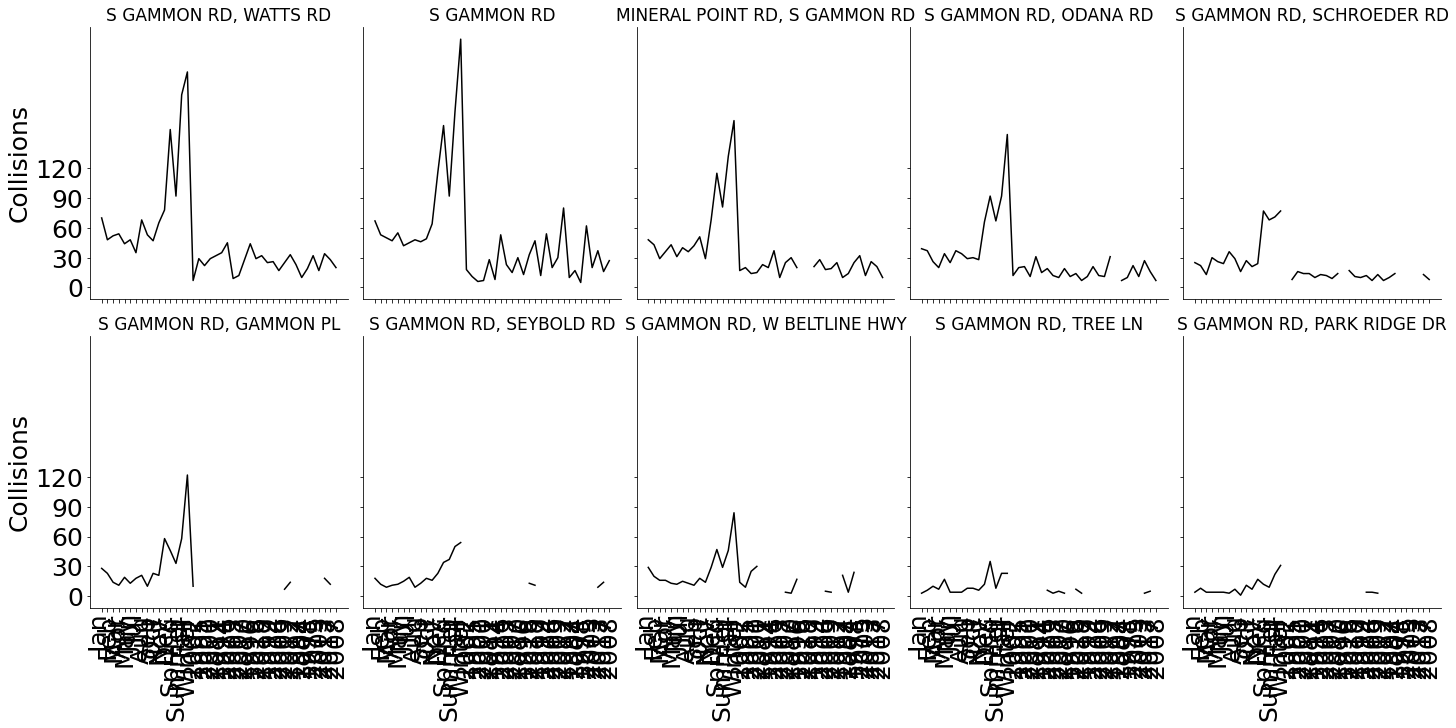

In [94]:
multi_plot(fix_df(gammon_df), 'sgammon.pdf', fix_df(gammon_df), nrow=2, ncol=5, ytik=[0, 30, 60, 90, 120]) #plot spiked inters geographically

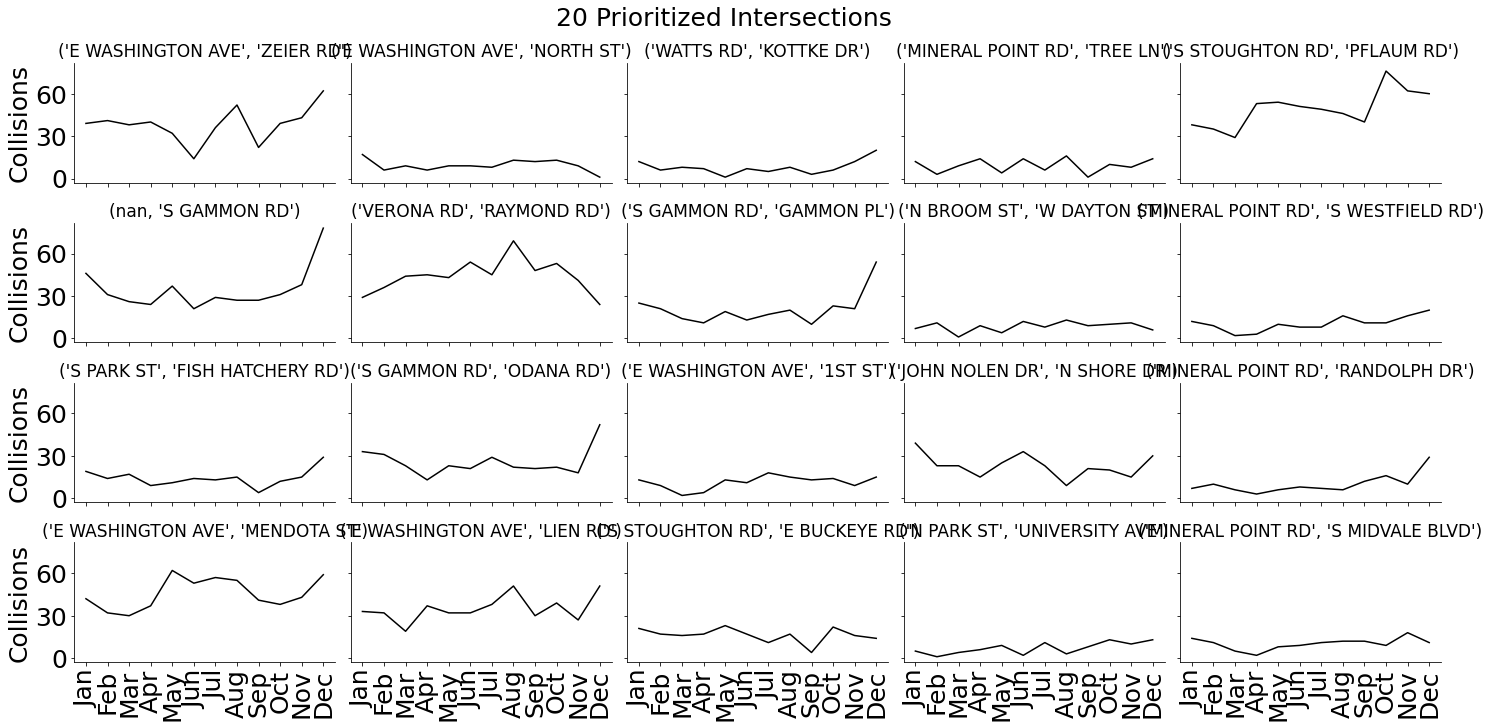

In [95]:
multi_plot(streets_plus_months_df, '20scaled', note_df, '20 Prioritized Intersections')

multi_plot(streets_plus_months_df, '20month.pdf', season_rat_df)

In [96]:
#multi_plot(streets_plus_months_df, '20monthrev.pdf', season_rat_df, 'Intersections with the Smallest Season to Season Ratio', rev=True)

In [97]:
#multi_plot(streets_plus_months_df, '20dang_sep.pdf', streets_plus_months_df,  'Crashes per Month for each of the 20 Most Dangerous Roads and Intersections')

In [98]:
times = all_data['NTFYHOUR'] # series with only hour of crash

In [99]:
# dict with time as key and number of crashes as value
times_dict = {}
for time in times:
    if time not in times_dict:
        times_dict[time] = 1
    else:
        times_dict[time] += 1
times_dict.pop(24)
times_dict[0] += times[24]

In [100]:
for time in times_dict:
    times_dict[time] = times_dict[time] / 1000

In [101]:
injtime = all_data[['NTFYHOUR', 'TOTINJ', 'TOTFATL']] # df with time, injuries and deaths

In [102]:
# dict with time as key and number of injuries as value
it_dict = {}
while len(it_dict) < 25:
    for time in injtime['NTFYHOUR']:
        if time not in it_dict:
            it_dict[time] = 0
for index, row in injtime.iterrows():
    it_dict[row[0]] += row[1]

In [103]:
for time in it_dict:
    it_dict[time] = it_dict[time] / 1000

In [104]:
it_dict.pop(24) # hour 24 should be counted as hour 0

0.0

In [105]:
# dict with time as key and number of deaths as value
ft_dict = {}
while len(ft_dict) < 25:
    for time in injtime['NTFYHOUR']:
        if time not in ft_dict:
            ft_dict[time] = 0
for index, row in injtime.iterrows():
    ft_dict[row[0]] += row[2]

In [106]:
for time in ft_dict:
    ft_dict[time] = ft_dict[time] / 1000

In [107]:
ft_dict.pop(24) # hour 24 should be counted as hour 0

0.0

In [108]:
times_df = DataFrame.from_dict(times_dict, orient='index', columns=['Collisions'])
times_df = times_df.sort_values(by=['Collisions'], ascending=False)
times_df = times_df.rename_axis('Hour')
times_df1 = times_df.sort_values(by=['Hour'])
it_df = DataFrame.from_dict(it_dict, orient='index', columns=['Injuries'])
it_df = it_df.rename_axis('Hour')
it_df = it_df.sort_values(by=['Hour'])
ft_df = DataFrame.from_dict(ft_dict, orient='index', columns=['Fatalities'])
ft_df = ft_df.rename_axis('Hour')
ft_df = ft_df.sort_values(by=['Hour'])

In [109]:
# dict with year as key and number of crashes as value
years_dict = {}
for date in dates:
    if int(date[-4:]) not in years_dict:
        years_dict[int(date[-4:])] = 1
    else:
        years_dict[int(date[-4:])] += 1

In [110]:
sgcyear_dict = {}
sgiyear_dict = {}
sgdyear_dict = {}
for i, row in all_data[['ACCDDATE', 'ONSTR', 'ATSTR', 'TOTINJ', 'TOTFATL']].iterrows():
    year = int(row[0][-4:])
    inj = int(row[3])
    fat = int(row[4])
    if row[1] == 'S GAMMON RD' or row[2] == 'S GAMMON RD':
        if year not in sgcyear_dict:
            sgcyear_dict[year] = 1
            sgiyear_dict[year] = 1
            sgdyear_dict[year] = 1
        else:
            sgcyear_dict[year] += 1
            sgiyear_dict[year] += inj
            sgdyear_dict[year] += fat

In [111]:
sgcyear_df = DataFrame.from_dict(sgcyear_dict, orient='index', columns=['Crashes'])
sgcyear_df = sgcyear_df.rename_axis('Year').sort_values(by=['Year'])

sgiyear_df = DataFrame.from_dict(sgiyear_dict, orient='index', columns=['Injuries'])
sgiyear_df = sgiyear_df.rename_axis('Year').sort_values(by=['Year'])

sgdyear_df = DataFrame.from_dict(sgdyear_dict, orient='index', columns=['Deaths'])
sgdyear_df = sgdyear_df.rename_axis('Year').sort_values(by=['Year'])

In [112]:
sgcyear_df['Injuries'] = sgiyear_df['Injuries']
sgcyear_df['Deaths'] = sgdyear_df['Deaths']

In [113]:
for year in years_dict:
    years_dict[year] = years_dict[year] / 1000

In [114]:
years_df = DataFrame.from_dict(years_dict, orient='index', columns=['Collisions'])
years_df = years_df.rename_axis('Year').sort_values(by=['Year'])

In [115]:
injdate = all_data[['ACCDDATE', 'TOTINJ', 'TOTFATL']] # df with date, injuries, deaths

In [116]:
# dict with month as key and number of crashes as value
months_dict = {}
for date in dates:
    num = date[:2]
    if num == '01':
        name='Jan'
    elif num == '02':
        name='Feb'
    elif num == '03':
        name='Mar'
    elif num == '04':
        name='Apr'
    elif num == '05':
        name='May'
    elif num == '06':
        name='Jun'
    elif num == '07':
        name='Jul'
    elif num == '08':
        name='Aug'
    elif num == '09':
        name='Sep'
    elif num == '10':
        name='Oct'
    elif num == '11':
        name='Nov'
    elif num == '12':
        name='Dec'
    if name not in months_dict:
        months_dict[name] = {}
        months_dict[name]['Collisions'] = 1
        months_dict[name]['Injuries'] = 0
        months_dict[name]['Fatalities'] = 0
        months_dict[name]['sort'] = int(num)
    else:
        months_dict[name]['Collisions'] += 1
for index, row in injdate.iterrows(): # adds number of inj, fat to the dict
    num = row[0][:2]
    if num == '01':
        name='Jan'
    elif num == '02':
        name='Feb'
    elif num == '03':
        name='Mar'
    elif num == '04':
        name='Apr'
    elif num == '05':
        name='May'
    elif num == '06':
        name='Jun'
    elif num == '07':
        name='Jul'
    elif num == '08':
        name='Aug'
    elif num == '09':
        name='Sep'
    elif num == '10':
        name='Oct'
    elif num == '11':
        name='Nov'
    elif num == '12':
        name='Dec'
    months_dict[name]['Injuries'] += row[1]
    months_dict[name]['Fatalities'] += row[2]

In [117]:
for month in months_dict:
    months_dict[month]['Collisions'] = months_dict[month]['Collisions'] / 1000
    months_dict[month]['Injuries'] = months_dict[month]['Injuries'] / 1000
    months_dict[month]['Fatalities'] = months_dict[month]['Fatalities'] / 1000
    months_dict[month]['sort'] = months_dict[month]['sort'] - 1

In [118]:
months_df = DataFrame.from_dict(months_dict, orient='index', columns=['Collisions', 'Injuries', 'Fatalities', 'sort'])
months_df = months_df.rename_axis('Month').sort_values(by=['sort'])

In [119]:
inj_year_dict = {} # makes dict with year as key
for date in injdate['ACCDDATE']:
        if date[-4:] not in inj_year_dict:
            inj_year_dict[int(date[-4:])] = 0
for index, row in injdate.iterrows(): # adds number of injuries to the dict
    year = int(row[0][-4:])
    inj_year_dict[year] += row[1]

In [120]:
for year in inj_year_dict:
    inj_year_dict[year] = inj_year_dict[year] / 1000

In [121]:
inj_year_df = DataFrame.from_dict(inj_year_dict, orient='index', columns=['Injuries'])
inj_year_df = inj_year_df.rename_axis('Year')
inj_year_df = inj_year_df.sort_values(by=['Year'])

In [122]:
fat_year_dict = {} # makes dict with dict with year as key
for date in injdate['ACCDDATE']:
        if date[-4:] not in fat_year_dict:
            fat_year_dict[int(date[-4:])] = 0
for index, row in injdate.iterrows(): # adds number of deaths to the dict
    year = int(row[0][-4:])
    fat_year_dict[year] += row[2]

In [123]:
for year in fat_year_dict:
    fat_year_dict[year] = fat_year_dict[year] / 1000

In [124]:
fat_year_df = DataFrame.from_dict(fat_year_dict, orient='index', columns=['Fatalities'])
fat_year_df = fat_year_df.rename_axis('Year')
fat_year_df = fat_year_df.sort_values(by=['Year'])

In [125]:
inj_per_cr_dict = {} # gives ratio of injuries per crash for times
for time in times_dict:
    inj_per_cr_dict[time] = it_dict[time] / times_dict[time]

In [126]:
inj_per_cr_df = DataFrame.from_dict(inj_per_cr_dict, orient='index', columns=['Injuries per Crash'])
inj_per_cr_df = inj_per_cr_df.rename_axis('Hour')
inj_per_cr_df = inj_per_cr_df.sort_values(by=['Hour'])

In [127]:
#inj_per_cr_df['Injuries per Crash']

In [128]:
years_df['Injuries'] = inj_year_df['Injuries'] #thousands
years_df['Deaths'] = fat_year_df['Fatalities']
years_df['Injury Rate'] = inj_year_df['Injuries'] / years_df['Collisions']
years_df['Fatality Rate'] = fat_year_df['Fatalities'] / years_df['Collisions']

In [129]:
bear ={}
inct = 0
fatct = 0
for i, row in all_data[['ATSTR', 'ONSTR', 'TOTINJ', 'TOTFATL']].iterrows():
    str0 = row[0]
    str1 = row[1]
    inj = row[2]
    fat = row[3]
    if str0 not in bear:
        bear[str0] = {}
        bear[str0]['Collisions'] = 1
        bear[str0]['Injuries'] = inj
        bear[str0]['Fatalities'] = fat
    else:
        bear[str0]['Collisions'] += 1
        bear[str0]['Injuries'] += inj
        bear[str0]['Fatalities'] += fat
    if str1 not in bear:
        bear[str1] = {}
        bear[str1]['Collisions'] = 1
        bear[str1]['Injuries'] = inj
        bear[str1]['Fatalities'] = fat
    else:
        bear[str1]['Collisions'] += 1
        bear[str1]['Injuries'] += inj
        bear[str1]['Fatalities'] += fat
    inct += inj
    fatct += fat
for strt in bear:
    bear[strt]['Collisions'] = bear[strt]['Collisions'] / 1000
    bear[strt]['Injuries'] = bear[strt]['Injuries'] / 1000
    bear[strt]['Fatalities'] = bear[strt]['Fatalities'] / 1000

In [130]:
print('Injuries:', inct, ' Fatalities:', fatct)

Injuries: 57703  Fatalities: 254


In [131]:
bear_df = DataFrame.from_dict(bear, orient='index')

In [132]:
bear_df = bear_df.sort_values(by='Collisions', ascending=False)

In [133]:
bear_df = bear_df.drop(np.nan)
bear_df = bear_df.head(7)

In [134]:
bear_df

,Collisions,Injuries,Fatalities
E WASHINGTON AVE,11.233,6.044,0.023
MINERAL POINT RD,5.335,2.611,0.010
UNIVERSITY AVE,5.181,2.520,0.008
S PARK ST,3.897,1.950,0.006
S GAMMON RD,3.839,1.845,0.002
S STOUGHTON RD,3.153,1.750,0.003
E JOHNSON ST,3.149,1.519,0.001


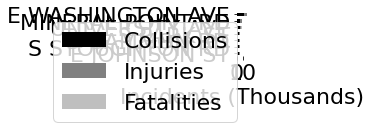

In [135]:
ax=get_ax((4, 2))
bear_df = bear_df.sort_values(by='Collisions')
bear_df.plot.barh(ax=ax, stacked=True, color=['0', '0.5', '0.75'])
plt.xlabel('Incidents (Thousands)')
plt.tight_layout()
plt.savefig('bear.pdf')

In [136]:
bear_df.loc['S GAMMON RD']['Fatalities'] / fatct

7.874015748031496e-06

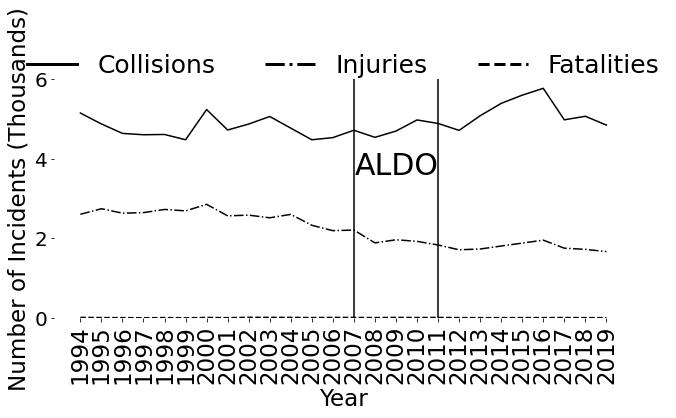

In [137]:
ax = get_ax((10, 6))
years_df[['Collisions']].plot(ax=ax, color='0', xticks=years_df.index).set_ylim(0, 6)
inj_year_df.plot(ax=ax, color='0', style = '-.', xticks=inj_year_df.index).set_ylim(0, 6)
fat_year_df.plot(ax=ax, color='0', style = '--', xticks=fat_year_df.index).set_ylim(0, 6)
ax.set_ylabel('Number of Incidents (Thousands)', size=23)
ax.set_xlabel('Year', size=23)
plt.xticks(rotation='vertical', size=23)
plt.yticks(size=20)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=20, fancybox=True, frameon=False)
plt.vlines(2007, 0, 6, color='0')
plt.vlines(2011, 0, 6, color='0')
ax.text(2007.05, 3.6, 'ALDO', size=30)
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper center', fontsize=25, ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.2))
plt.tight_layout()
plt.savefig('crash_per_year.pdf')

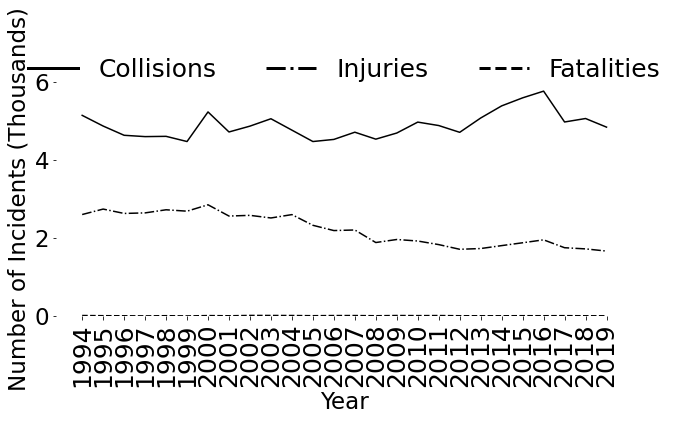

In [138]:
ax = get_ax((10, 6))
years_df[['Collisions']].plot(ax=ax, color='0', xticks=years_df.index).set_ylim(0, 6)
inj_year_df.plot(ax=ax, color='0', style = '-.', xticks=inj_year_df.index).set_ylim(0, 6)
fat_year_df.plot(ax=ax, color='0', style = '--', xticks=fat_year_df.index).set_ylim(0, 6)
ax.set_ylabel('Number of Incidents (Thousands)', size=23)
ax.set_xlabel('Year', size=23)
plt.xticks(rotation='vertical', size=25)
plt.yticks(size=23)
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper center', fontsize=25, ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.2))
plt.tight_layout()
plt.savefig('crash_per_year1.pdf')

In [139]:
years_df.describe()

,Collisions,Injuries,Deaths,Injury Rate,Fatality Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4.892962,2.219346,0.009769,0.457034,0.002000
std,0.333736,0.409165,0.003433,0.096215,0.000712
min,4.475000,1.666000,0.003000,0.335127,0.000670
25%,4.649500,1.843750,0.007000,0.354919,0.001455
50%,4.857000,2.199500,0.009000,0.476086,0.001900
75%,5.063500,2.602500,0.013000,0.544622,0.002706
max,5.767000,2.853000,0.016000,0.600894,0.003285


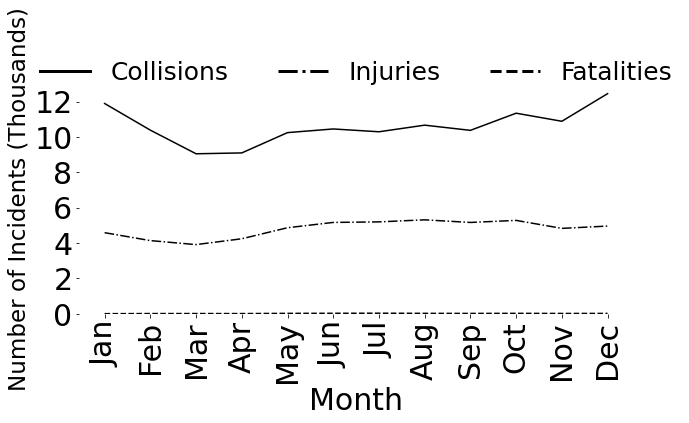

In [140]:
ax = get_ax((10, 6))
font = 30
months_df[['Collisions']].plot(ax=ax, color='0', xticks=months_df['sort']).set_ylim(0, 13)
plt.xticks(rotation = 'vertical')
months_df[['Injuries']].plot(ax=ax, color='0', style = '-.', xticks=months_df['sort']).set_ylim(0, 13)
months_df[['Fatalities']].plot(ax=ax, color='0', style = '--', xticks=months_df['sort']).set_ylim(0, 13)
plt.xticks(months_df['sort'], months_df.index,  rotation = 'vertical')
ax.set_xlabel('Month', size=font)
ax.set_ylabel('Number of Incidents (Thousands)', size=23)
plt.xticks(size=font)
plt.yticks(size=font)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper center', fontsize=25, ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.2))
plt.tight_layout()
plt.savefig('crashes_per_month.pdf')

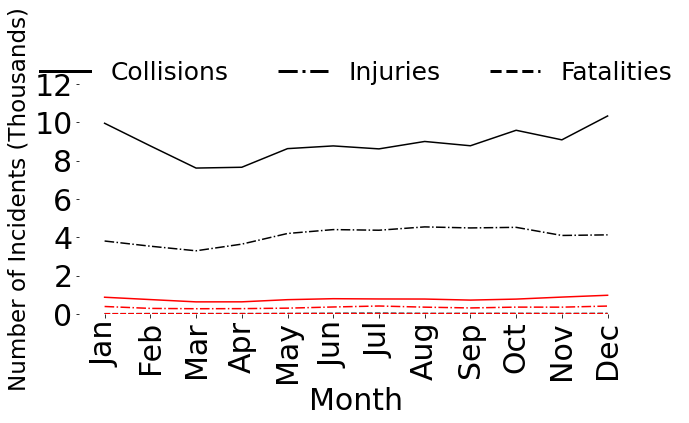

In [141]:
ax = get_ax((10, 6))
font=30
inter_date_df.plot(ax=ax, color='0').set_ylim(0, 11)
inter_injdate_df.plot(ax=ax, color='0', style='-.').set_ylim(0, 11)
inter_fatdate_df.plot(ax=ax, color='0', style='--').set_ylim(0, 11)
noninter_date_df.plot(ax=ax, color='red').set_ylim(0, 11)
noninter_injdate_df.plot(ax=ax, color='red', style='-.').set_ylim(0, 11)
noninter_fatdate_df.plot(ax=ax, color='red', style='--').set_ylim(0, 11)
#inter_noninter_rat_df.plot(ax=ax1, color='blue', style=':', secondary_y=True).set_ylim(0, 13)

#ax.legend(loc='upper center', fontsize=13, labelspacing=0, ncol=3, bbox_to_anchor=(0.5, 1.4), fancybox=True, frameon=False, shadow=False)
xtiks = []
i=0
while i in range(12):
    xtiks.append(i)
    i+=1
plt.xticks(xtiks, inter_date_df.index, size=font, rotation='vertical')
ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
ax.set_ylabel('Number of Incidents (Thousands)', size=23)
plt.yticks(fontsize=font)
ax.set_xlabel('Month', size=font)
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper center', fontsize=25, ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.2))

plt.tight_layout()
plt.savefig('int vs nonint by month.pdf')

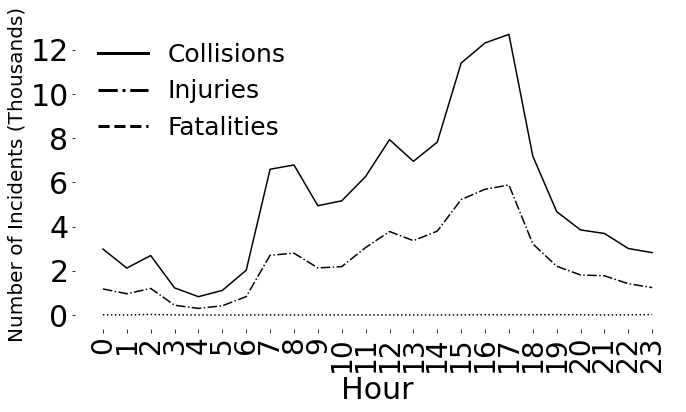

In [142]:
ax = get_ax((10, 6))
font=30
times_df1.plot(ax=ax, color='0', xticks = times_df1.index)
it_df.plot(ax=ax, color='0', style='-.')
ft_df.plot(ax=ax, color='0', style=':')

plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Incidents (Thousands)', size=20)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
plt.xticks(fontsize=font-2)
plt.yticks(fontsize=font)
plt.xlabel('Hour', size=font)
#ax.legend(loc='upper center', fontsize=25, labelspacing=0, ncol=4, bbox_to_anchor=(0.5, 1.2), fancybox=True, shadow=False, frameon=False)
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper left', fontsize=25, frameon=False)

plt.tight_layout()
plt.savefig('crashes_inj_fat_chron.pdf')

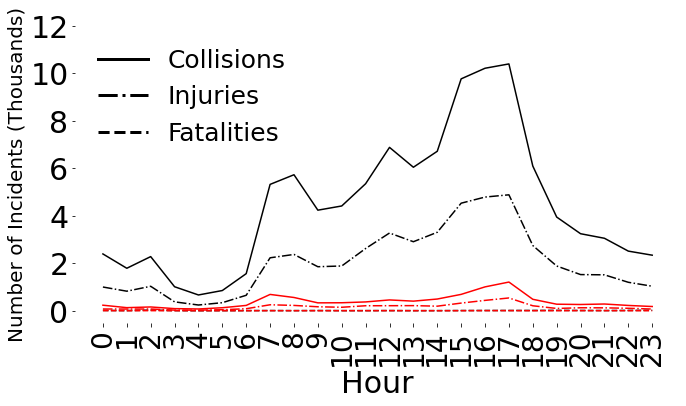

In [143]:
ax = get_ax((10, 6))
font=30
inter_time_df[['Intersection Collisions']].plot(ax=ax, color='0', xticks = inter_time_df.index)
inter_time_df[['Intersection Injuries']].plot(ax=ax, color='0', style='-.')
inter_time_df[['Intersection Fatalities']].plot(ax=ax, color='0', style='--')
noninter_time_df[['Non-Intersection Collisions']].plot(ax=ax, color='red')
noninter_time_df[['Non-Intersection Injuries']].plot(ax=ax, color='red', style='-.')
noninter_time_df[['Non-Intersection Fatalities']].plot(ax=ax, color='red', style='--')

plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Incidents (Thousands)', size=20)
ax.set_yticks([0, 2, 4, 6, 8, 10, 12])
plt.xticks(fontsize=font-2)
plt.yticks(fontsize=font)
plt.xlabel('Hour', size=font)
lines = [Line2D([0], [0], color='0', linewidth=3),
        Line2D([0], [0], color='0', linewidth=3, linestyle='-.'),
        Line2D([0], [0], color='0', linewidth=3, linestyle='--')]
labels = ['Collisions', 'Injuries', 'Fatalities']
ax.legend(lines, labels, loc='upper left', fontsize=25, frameon=False)

plt.tight_layout()
plt.savefig('inters_time.pdf')

In [144]:
noninter_time_df[['Non-Intersection Fatalities']].sum()

Non-Intersection Fatalities    0.034
dtype: float64

In [145]:
inter_time_df[['Intersection Fatalities']].sum()

Intersection Fatalities    0.194
dtype: float64

In [146]:
0.034 / (0.034+0.194)

0.14912280701754385

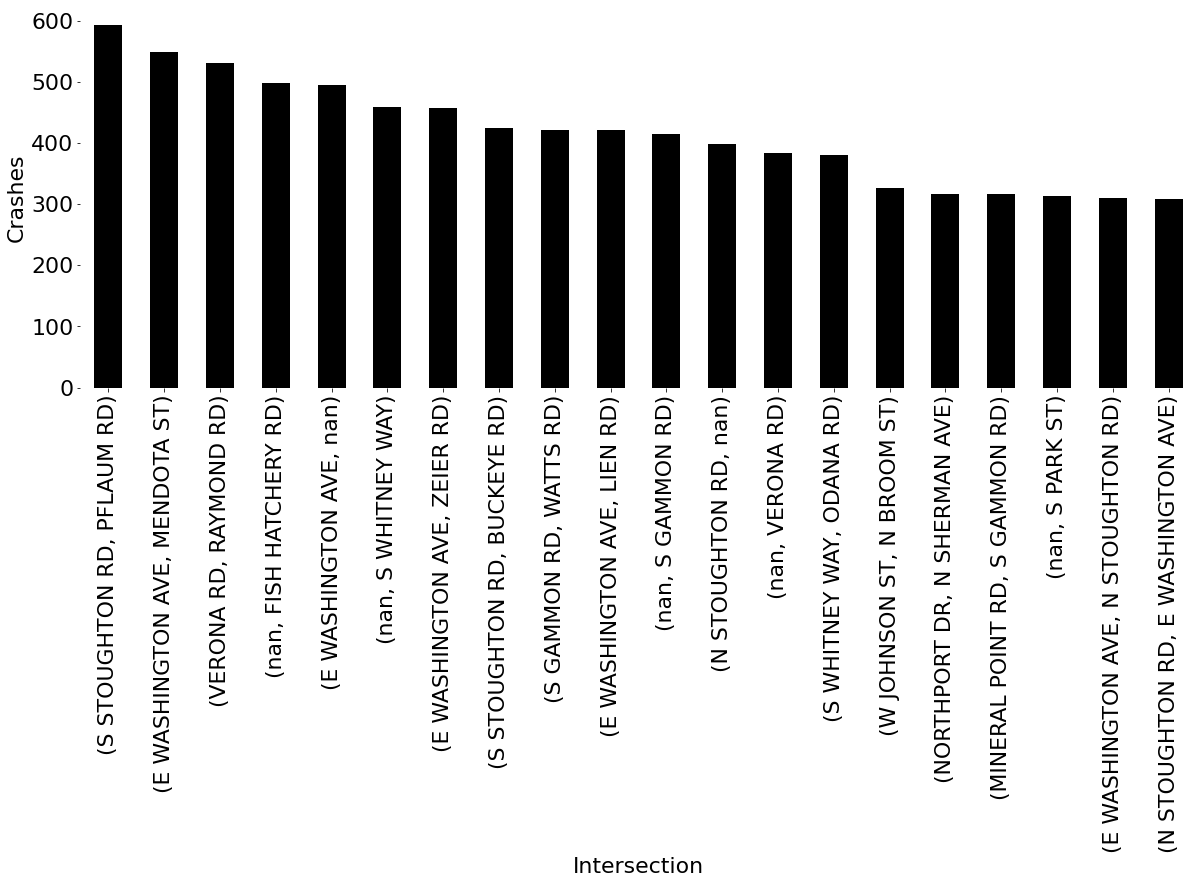

In [147]:
# Drop offs after 1st 3rd 5th, 7th and 14th most
hnum = 20
ax = get_ax()
streets_df.head(hnum).plot.bar(ax=ax, color = '0', figsize=(20, 7))
#plt.title(str(hnum) + ' Most Dangerous Intersections')
ax.set_ylabel('Crashes')
plt.xticks(rotation = 'vertical')
ax.get_legend().remove()

<ipython-input-148-60a7b9e72745>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


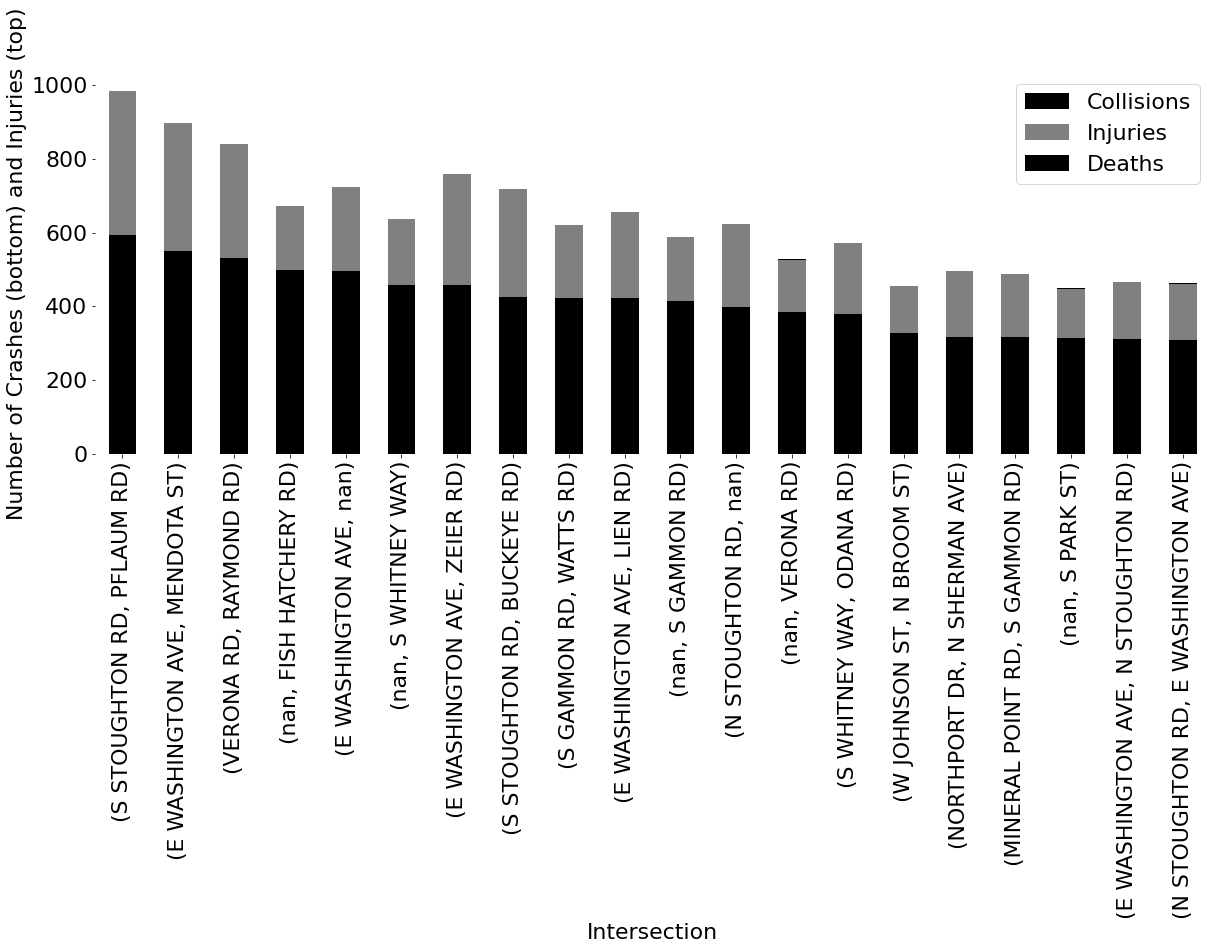

In [148]:
hnum = 20
ax = get_ax() #trouble scaling
streets_plus_df[['Collisions', 'Injuries', 'Deaths']].head(hnum).plot.bar(ax=ax, stacked=True, color = ['0', '0.5'], figsize=(20, 7))
#plt.title(str(hnum) + ' Most Dangerous Intersections')
plt.xticks(rotation = 'vertical')
plt.xlabel('Intersection')
plt.ylabel('Number of Crashes (bottom) and Injuries (top)')
plt.tight_layout()
plt.savefig('20_most_dangerous_stacked.pdf')

<ipython-input-149-6c71f30e677c>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


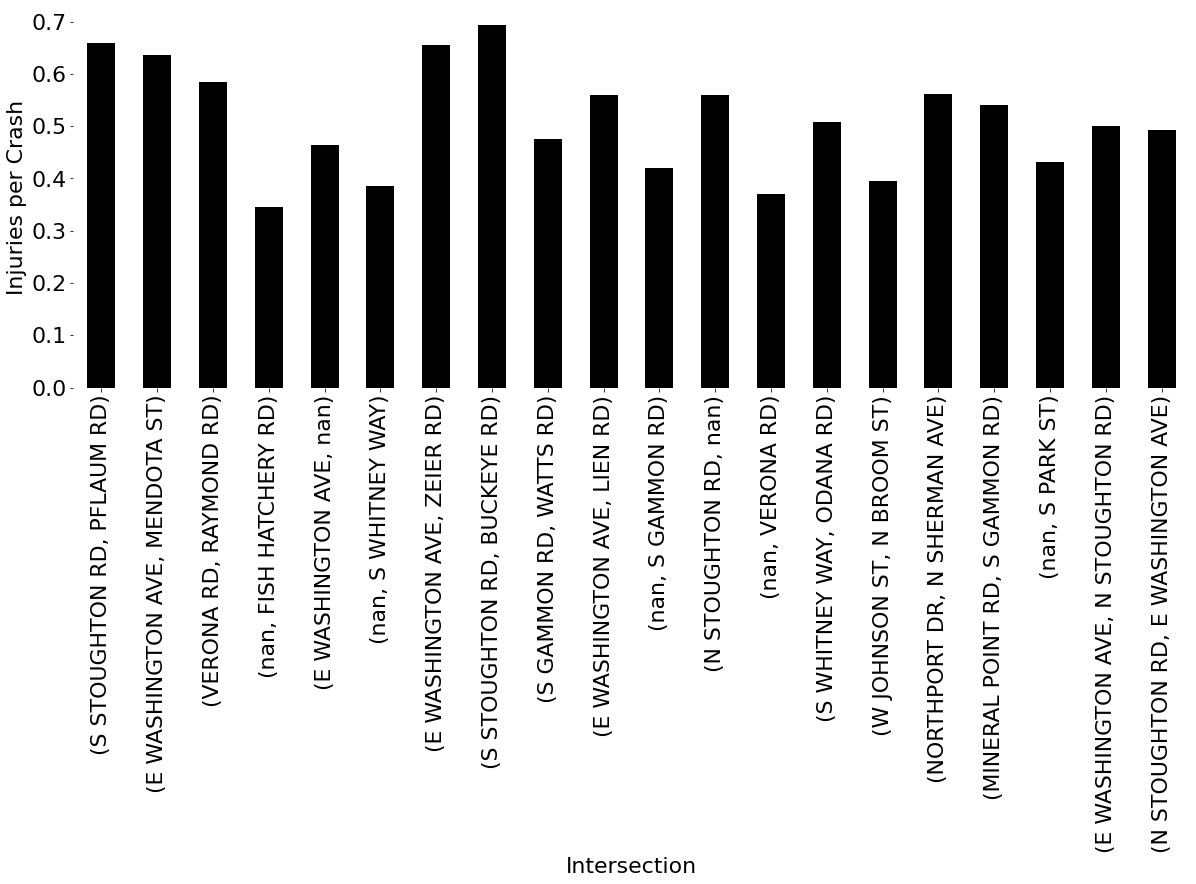

In [149]:
streets_rates_dict = {} # idealy share x axis from above but goes downward with new y scale?
humn = 20
i = 0
while i < len(streets_plus_df.head(humn)):
    totc = streets_plus_df.iloc[i][0]
    toti = streets_plus_df.iloc[i][1]
    streets_rates_dict[streets_plus_df.index[i]] = toti / totc    
    i += 1
streets_rates_df = DataFrame.from_dict(streets_rates_dict, orient='index', columns = ['Injuries / Crash'])
ax = get_ax((20, 10))
streets_rates_df.plot.bar(ax=ax, color='0', figsize = ((20, 7)))
#plt.title('Injury Rates of the' + str(hnum) + ' Most Dangerous Intersections')
plt.xlabel('Intersection')
plt.ylabel('Injuries per Crash')
ax.get_legend().remove()
plt.tight_layout()
plt.savefig('20_most_dang_rates.pdf')

In [150]:
inter_time_df

,Intersection Collisions,Intersection Injuries,Intersection Fatalities
0,2.391,0.998,0.012
1,1.788,0.822,0.005
2,2.279,1.029,0.025
3,1.010,0.373,0.005
4,0.663,0.240,0.001
...,...,...,...
19,3.945,1.883,0.014
20,3.243,1.522,0.010
21,3.051,1.511,0.007
22,2.510,1.197,0.012


In [151]:
inj_per_cr_df.describe()

,Injuries per Crash
count,24.000000
mean,0.441342
std,0.038666
min,0.362307
25%,0.412044
50%,0.450915
75%,0.471314
max,0.487404


<AxesSubplot:>

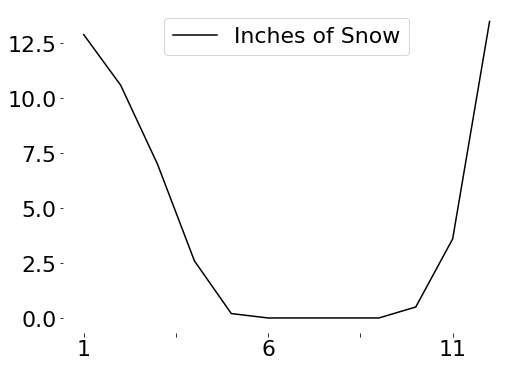

In [152]:
snow_dict = {'1':12.9, '2':10.6, '3':7, '4':2.6, '5':0.2, '6':0, '7':0, '8':0, '9':0, '10':0.5, '11':3.6, '12':13.5}
snow_df = pd.DataFrame.from_dict(snow_dict, orient='index', columns=['Inches of Snow'])
ax = get_ax()
snow_df.plot(ax=ax, color='0')

In [153]:
#inter_date_df

In [154]:
sgcyear_df['Injury Rate'] = sgcyear_df['Injuries'] / sgcyear_df['Crashes']
sgcyear_df['Fatality Rate'] = sgcyear_df['Deaths'] / sgcyear_df['Crashes']

In [155]:
inj_sim=DataFrame()
inj_rate = list(years_df['Injury Rate'])
coli_num = list(years_df['Collisions'])
for i in range(20):
    rates = random.choices(inj_rate, k=10)
    collisions = random.choices(coli_num, k=10)
    inj_nums = Series(collisions)*Series(inj_rate)
    inj_nums95 = Series(collisions)*Series(inj_rate)*0.95
    inj_sim['sim diff'+str(i)] = Series(inj_nums - inj_nums95).cumsum()

In [156]:
fat_sim=DataFrame()
fat_rate = list(years_df['Fatality Rate'])
coli_num = list(years_df['Collisions'])
for i in range(20):
    rates = random.choices(fat_rate, k=10)
    collisions = random.choices(coli_num, k=10)
    fat_nums = Series(collisions)*Series(fat_rate)
    fat_nums95 = Series(collisions)*Series(fat_rate)*0.95
    fat_sim['sim diff'+str(i)] = Series(fat_nums - fat_nums95).cumsum()*1000

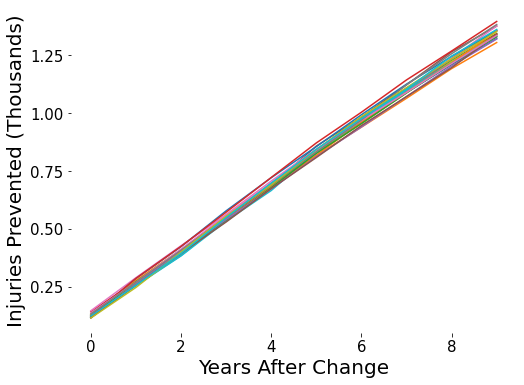

In [157]:
ax = get_ax()
inj_sim.plot(ax=ax)
plt.ylabel('Injuries Prevented (Thousands)', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
ax.get_legend().remove()
#plt.tight_layout()
plt.savefig('5reduc.pdf')

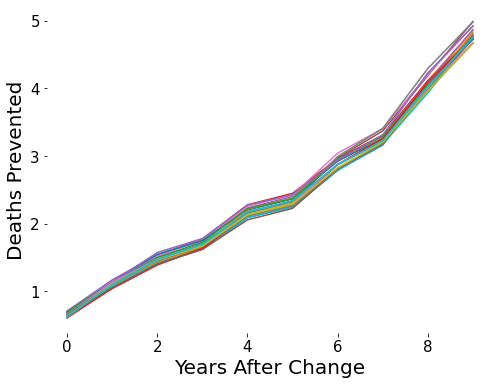

In [158]:
ax = get_ax()
fat_sim.plot(ax=ax)
plt.ylabel('Deaths Prevented', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
ax.get_legend().remove()
#plt.tight_layout()
plt.savefig('5reducfat.pdf')

In [159]:
sginj_sim=DataFrame()
sgfat_sim=DataFrame()
inj_rate = list(sgcyear_df['Injury Rate'])
fat_rate = list(sgcyear_df['Fatality Rate'])
coli_num = list(sgcyear_df['Crashes'])
for i in range(1000):
    rates = random.choices(inj_rate, k=10)
    collisions = random.choices(coli_num, k=10)
    inj_nums = Series(collisions)*Series(inj_rate)
    inj_nums95 = Series(collisions)*Series(inj_rate)*0.95
    sginj_sim['sim diff'+str(i)] = Series(inj_nums - inj_nums95).cumsum()
    fat_nums = Series(collisions)*Series(fat_rate)
    fat_nums95 = Series(collisions)*Series(fat_rate)*0.95
    sgfat_sim['sim diff'+str(i)] = Series(fat_nums - fat_nums95).cumsum()

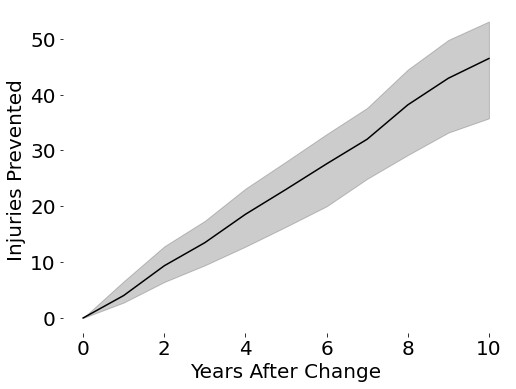

In [160]:
uplst = [0]
medlst = [0]
dwlst = [0]
yearlst = [0]
for i in range(len(sginj_sim.head(10))):
    yearlst.append(i + 1)
    uplst.append(np.percentile(sginj_sim.iloc[i], 95))
    medlst.append(sginj_sim.iloc[i].median())
    dwlst.append(np.percentile(sginj_sim.iloc[i].min(), 5))
ax = get_ax()
plt.plot(yearlst, medlst, color='0')
plt.fill_between(yearlst, dwlst, uplst, color='0', alpha=0.2)
plt.ylabel('Injuries Prevented', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.savefig('5sgreduc_percentile.pdf')

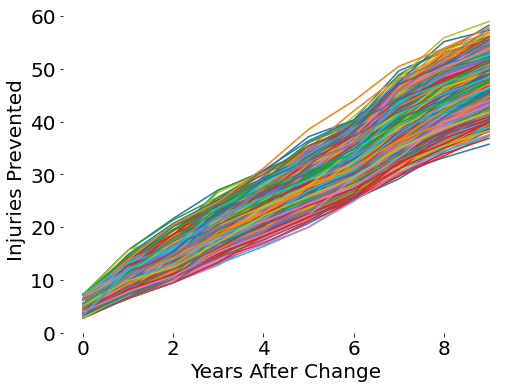

In [161]:
ax = get_ax()
sginj_sim.plot(ax=ax)
plt.ylabel('Injuries Prevented', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
ax.get_legend().remove()
#plt.tight_layout()
#plt.savefig('5sgreduc.pdf')

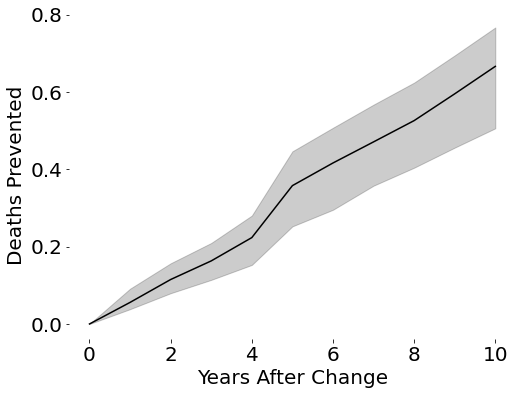

In [162]:
uplst = [0]
medlst = [0]
dwlst = [0]
yearlst = [0]
for i in range(len(sgfat_sim.head(10))):
    yearlst.append(i + 1)
    uplst.append(np.percentile(sgfat_sim.iloc[i], 95))
    medlst.append(sgfat_sim.iloc[i].median())
    dwlst.append(np.percentile(sgfat_sim.iloc[i].min(), 5))
ax = get_ax()
plt.plot(yearlst, medlst, color='0')
plt.fill_between(yearlst, dwlst, uplst, color='0', alpha=0.2)
plt.ylabel('Deaths Prevented', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=20)
plt.xticks(size=20)
plt.savefig('5sgreducfat_percentile.pdf')

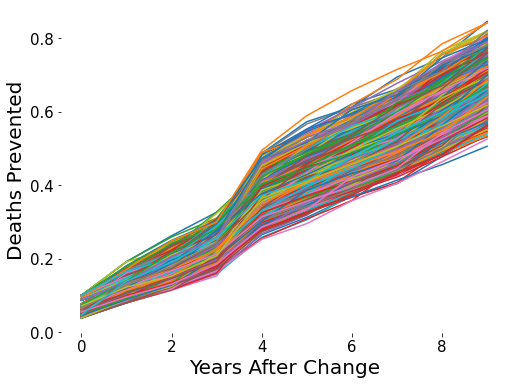

In [163]:
ax = get_ax()
sgfat_sim.plot(ax=ax)
plt.ylabel('Deaths Prevented', size=20)
plt.xlabel('Years After Change', size=20)
plt.yticks(size=15)
plt.xticks(size=15)
ax.get_legend().remove()
#plt.tight_layout()
plt.savefig('5sgreducfat.pdf')

In [164]:
int(gammon_df[['Collisions']].sum()) / int(streets_df[['Number of Collisions']].sum())

0.030910454864444104

In [165]:
gammon_df[['Collisions']].sum()

Collisions    3832.0
dtype: float64

In [166]:
gammon_df[['Injuries']].sum()

Injuries    1842.0
dtype: float64

In [167]:
gammon_df[['Deaths']].sum()

Deaths    2.0
dtype: float64

In [168]:
months_df[['Collisions']].sum()

Collisions    127.217
dtype: float64

In [169]:
months_df[['Fatalities']].sum()

Fatalities    0.254
dtype: float64

In [170]:
0.254 / 127.217

0.001996588506253095

In [171]:
fsgammon_df.index

Index(['S GAMMON RD, WATTS RD', 'S GAMMON RD', 'MINERAL POINT RD, S GAMMON RD',
       'S GAMMON RD, ODANA RD', 'S GAMMON RD, SCHROEDER RD',
       'S GAMMON RD, GAMMON PL', 'S GAMMON RD, SEYBOLD RD',
       'S GAMMON RD, W BELTLINE HWY', 'S GAMMON RD, TREE LN',
       'S GAMMON RD, PARK RIDGE DR', 'S GAMMON RD, RAMP',
       'RAYMOND RD, S GAMMON RD', 'S GAMMON RD, GAMMON LN',
       'S GAMMON RD, NEW WASHBURN WAY'],
      dtype='object')

In [172]:
fsgammon_df.loc['S GAMMON RD, ODANA RD']['Injuries'] -fsgammon_df.loc['MINERAL POINT RD, S GAMMON RD']['Injuries']

-57.0

In [173]:
test_sgammonbar.columns

Index(['Not Recorded', 'Failure to Yield', 'Follow too Closely', 'Other'], dtype='object')

In [174]:
test_sgammonbar.index

Index(['S GAMMON RD', ' WATTS RD', 'MINERAL POINT RD', ' ODANA RD',
       ' SCHROEDER RD', 'GAMMON PL', ' SEYBOLD RD', ' W BELTLINE HWY',
       ' TREE LN', ' PARK RIDGE DR', ' RAMP', 'RAYMOND RD', ' GAMMON LN',
       ' NEW WASHBURN WAY'],
      dtype='object')

In [175]:
test_sgammonbar.loc[' ODANA RD'].sum() - test_sgammonbar.loc[' WATTS RD'].sum()

-521

In [176]:
test_sgammonbar.loc[' WATTS RD'].sum()#['Failure to Yield'] - test_sgammonbar.loc['MINERAL POINT RD']['Failure to Yield']

1373

In [177]:
temp = []
i=1994
while i < 2020:
    temp.append(str(i))
    i += 1

In [178]:
sgammonyears_df = fsgammon_df[temp]

In [179]:
#pd.set_option("max_rows", None)
years_df.loc[2019]

Collisions       4.844000
Injuries         1.666000
Deaths           0.007000
Injury Rate      0.343931
Fatality Rate    0.001445
Name: 2019, dtype: float64

In [180]:
years_df.describe()

,Collisions,Injuries,Deaths,Injury Rate,Fatality Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,4.892962,2.219346,0.009769,0.457034,0.002000
std,0.333736,0.409165,0.003433,0.096215,0.000712
min,4.475000,1.666000,0.003000,0.335127,0.000670
25%,4.649500,1.843750,0.007000,0.354919,0.001455
50%,4.857000,2.199500,0.009000,0.476086,0.001900
75%,5.063500,2.602500,0.013000,0.544622,0.002706
max,5.767000,2.853000,0.016000,0.600894,0.003285


In [181]:
years_df[['Deaths']].sum()

Deaths    0.254
dtype: float64

In [182]:
speeds_df = all_data[['POSTSPD1', 'POSTSPD2', 'TOTINJ', 'TOTFATL']]
speeds_df.head(10)

,POSTSPD1,POSTSPD2,TOTINJ,TOTFATL
0,77.0,25.0,0,0
1,0.0,0.0,0,0
2,25.0,25.0,0,0
3,55.0,NaN,1,0
4,55.0,NaN,0,0
5,55.0,NaN,1,0
6,55.0,55.0,0,0
7,55.0,55.0,1,0
8,55.0,55.0,0,0
9,55.0,55.0,0,0


In [183]:
limits_dict = {}
for i, row in speeds_df.iterrows():
    spd0 = row[0]
    spd1 = row[1]
    inj = row[2]
    fat = row[3]
    if str(spd0)[0] == 'n':
        continue
    if int(spd0) in limits_dict:
        limits_dict[int(spd0)]['Collisions'] += 1
        limits_dict[int(spd0)]['Injuries'] += inj
        limits_dict[int(spd0)]['Fatalities'] += fat
    if spd0 not in limits_dict:
        limits_dict[int(spd0)] = {}
        limits_dict[int(spd0)]['Collisions'] = 1
        limits_dict[int(spd0)]['Injuries'] = inj
        limits_dict[int(spd0)]['Fatalities'] = fat
    if str(spd1)[0] == 'n':
        continue
    if int(spd1) in limits_dict:
        limits_dict[int(spd1)]['Collisions'] += 1
        limits_dict[int(spd1)]['Injuries'] += inj
        limits_dict[int(spd1)]['Fatalities'] += fat
    if int(spd1) not in limits_dict:
        limits_dict[int(spd1)] = {}
        limits_dict[int(spd1)]['Collisions'] = 1
        limits_dict[int(spd1)]['Injuries'] = inj
        limits_dict[int(spd1)]['Fatalities'] = fat
for spd in limits_dict:
    limits_dict[spd]['Injuries per Crash'] = limits_dict[spd]['Injuries'] / limits_dict[spd]['Collisions']
    limits_dict[spd]['Fatalities per Crash'] = limits_dict[spd]['Fatalities'] / limits_dict[spd]['Collisions']
    limits_dict[spd]['Collisions'] = limits_dict[spd]['Collisions'] / 1000
    limits_dict[spd]['Injuries'] = limits_dict[spd]['Injuries'] / 1000
    limits_dict[spd]['Fatalities'] = limits_dict[spd]['Fatalities'] / 1000

In [184]:
limits_df = DataFrame.from_dict(limits_dict, orient='index')
limits_df

,Collisions,Injuries,Fatalities,Injuries per Crash,Fatalities per Crash
77,7.203,2.751,0.015,0.381924,0.002082
25,86.334,34.042,0.075,0.394306,0.000869
0,5.232,1.919,0.005,0.366781,0.000956
55,19.020,9.177,0.057,0.482492,0.002997
35,54.063,27.621,0.079,0.510904,0.001461
...,...,...,...,...,...
2,0.099,0.048,0.000,0.484848,0.000000
20,0.632,0.252,0.000,0.398734,0.000000
6,0.003,0.001,0.000,0.333333,0.000000
4,0.025,0.013,0.000,0.520000,0.000000


In [185]:
(5.232+7.203+0.138+0.099+0.003+0.028) / (222.556+(5.232+7.203+0.138+0.099+0.003+0.028))

0.05399580887447452

In [186]:
limits_df = DataFrame.from_dict(limits_dict, orient='index')
limits_df = limits_df.drop(0.0)
limits_df = limits_df.drop(77)
limits_df = limits_df.drop(1)
limits_df = limits_df.drop(2)
limits_df = limits_df.drop(3)
limits_df = limits_df.drop(4)
limits_df = limits_df.drop(6)
#limits_df = limits_df.sort_values(by=index, ascending=False)
limits_df = limits_df.sort_index()

In [187]:
limits_df['mph'] = limits_df.index

In [188]:
df = limits_df
#df

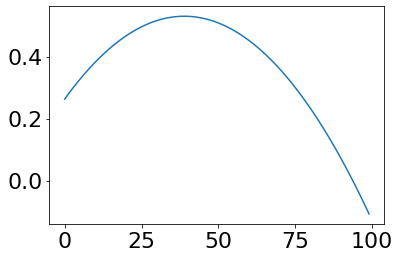

In [189]:
ycol = "Injuries per Crash"
p = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lr', LinearRegression())])
p.fit(df[["mph"]], df[ycol])
plt.plot(np.arange(100), p.predict(np.arange(100).reshape(-1,1)))

Text(0.5, 0, 'Speed Limit')

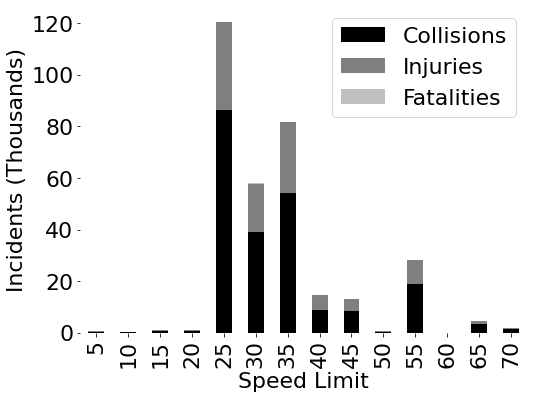

In [190]:
ax = get_ax()
limits_df[['Collisions', 'Injuries', 'Fatalities']].plot.bar(ax=ax, stacked=True, color=['0', '0.5', '0.75'])
plt.ylabel('Incidents (Thousands)')
plt.xlabel('Speed Limit')

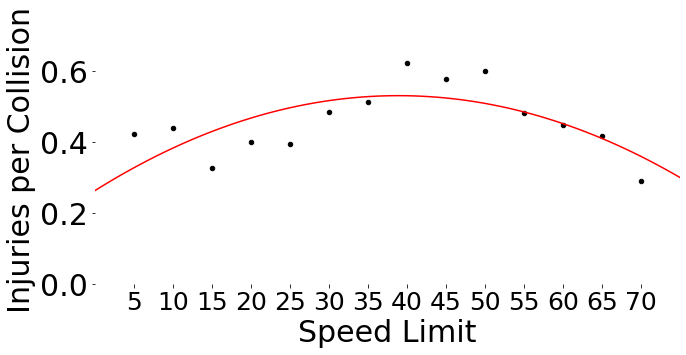

In [191]:
ax=get_ax((10, 5))
#redlimits_df = redlimits_df.sort_values(by='Injuries per Crash', ascending=False)
limits_df.plot.scatter(ax=ax, x= 'mph', y='Injuries per Crash', color='0')
plt.ylabel('Injuries per Collision', size=30)
plt.xlabel('Speed Limit', size=30)
ax.set_xticks(limits_df.index)

ycol = "Injuries per Crash"
p = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lr', LinearRegression())])
p.fit(df[["mph"]], df[ycol])
plt.plot(np.arange(100), p.predict(np.arange(100).reshape(-1,1)), color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
plt.xlim(0, 75)
plt.ylim(0, 0.7)

plt.tight_layout()
plt.savefig('spdlim_injrat.pdf')

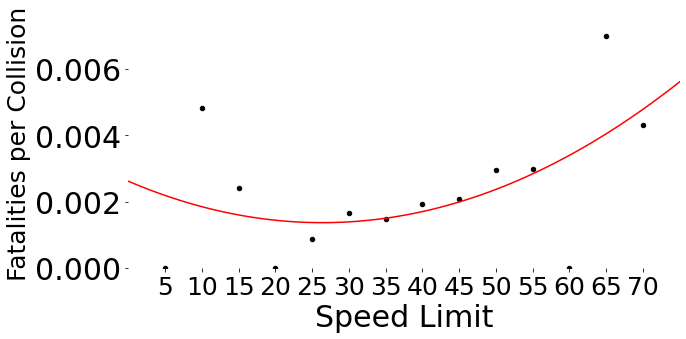

In [192]:
ax=get_ax((10, 5))
#redlimits_df = redlimits_df.sort_values(by='Fatalities per Crash', ascending=False)
limits_df.plot.scatter(ax=ax, x= 'mph', y='Fatalities per Crash', color='0')

ycol = "Fatalities per Crash"
p = Pipeline([('poly', PolynomialFeatures(2, include_bias=False)), ('lr', LinearRegression())])
p.fit(df[["mph"]], df[ycol])
plt.plot(np.arange(100), p.predict(np.arange(100).reshape(-1,1)), color='red')

plt.xlim(0, 75)
plt.ylim(0, 0.0075)
plt.ylabel('Fatalities per Collision', size=25)
plt.xlabel('Speed Limit', size=30)
ax.set_xticks(limits_df.index)
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig('spdlim_fatrat.pdf')

In [193]:
#redlimits_df.to_csv('spdlimits_df.csv')

In [194]:
sgammon_df[['Deaths']].sum()

Deaths    1.0
dtype: float64

In [195]:
alc = all_data[['ALCFLAG', 'TOTINJ', 'TOTFATL', 'ACCDDATE']]

In [196]:
alc_dict = {}
for i, row in alc.iterrows():
    year = int(row[3][-4:])
    if year not in alc_dict:
        alc_dict[year] = {}
        alc_dict[year]['Alcohol Collisions'] = 0
        alc_dict[year]['Alcohol Injuries'] = 0
        alc_dict[year]['Alcohol Fatalities'] = 0
        alc_dict[year]['Non-Alcohol Collisions'] = 0
        alc_dict[year]['Non-Alcohol Injuries'] = 0
        alc_dict[year]['Non-Alcohol Fatalities'] = 0
    if row[0] == 'Y':
        alc_dict[year]['Alcohol Collisions'] += 1
        alc_dict[year]['Alcohol Injuries'] += row[1]
        alc_dict[year]['Alcohol Fatalities'] += row[2]
    else:
        alc_dict[year]['Non-Alcohol Collisions'] += 1
        alc_dict[year]['Non-Alcohol Injuries'] += row[1]
        alc_dict[year]['Non-Alcohol Fatalities'] += row[2]

In [197]:
alc_df = DataFrame.from_dict(alc_dict, orient='index')
alc_df = alc_df.sort_index()

In [198]:
alc_df

,Alcohol Collisions,Alcohol Injuries,Alcohol Fatalities,Non-Alcohol Collisions,Non-Alcohol Injuries,Non-Alcohol Fatalities
1994,402,282,7,4744,2321,7
1995,368,282,6,4504,2461,3
1996,350,287,1,4285,2344,6
1997,328,281,3,4273,2364,1
1998,303,251,5,4305,2474,4
...,...,...,...,...,...,...
2015,193,106,2,5402,1773,7
2016,196,97,4,5571,1857,4
2017,201,104,1,4775,1648,9
2018,193,99,1,4872,1623,6


In [199]:
alc_df[['Alcohol Fatalities']].sum()[0] / alc_df[['Non-Alcohol Fatalities']].sum()[0]

0.9538461538461539